In [1]:
# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [3]:
# Loading Datasets

In [4]:
df_train = pd.read_csv('C:/Users/ZASHANK/American_Express/train_allx.csv')
#df_test = pd.read_csv('C:/Users/ZASHANK/American_Express/val_allx.csv')
target = pd.read_csv('C:/Users/ZASHANK/American_Express/train_y.csv')

In [5]:
#del df_test

In [6]:
Train_IDs = df_train['ID']
#Test_IDs = df_test['ID']
df_train.drop(['ID'],axis = 1,inplace = True)
#df_test.drop(['ID'],axis = 1,inplace = True)

In [7]:
df_train.head(5)

,B_37,S_24,S_4,S_14,B_25,D_38,B_30,D_138,P_2,S_7,...,D_43,D_4,D_85,D_78,D_42,D_52,D_29,R_1,R_28,S_5
0,0.006462,0.008118,0.853027,0.556641,1.003906,NaN,0.021301,0.511230,1.004883,0.081543,...,NaN,0.502441,0.002375,0.008270,0.008835,0.001913,1.007812,0.008171,0.008514,0.004307
1,0.007748,0.006310,0.758301,0.686035,0.001836,NaN,0.088501,0.557129,0.687988,0.353027,...,NaN,0.009544,1.002930,0.002613,0.003374,0.000530,0.006649,0.006798,0.003426,0.009224
2,0.005405,0.005219,0.766602,0.284668,1.002930,NaN,0.005821,0.854980,0.927734,0.059479,...,NaN,0.008736,0.008751,0.002541,0.009300,0.001654,0.000212,0.007599,0.009224,0.009636
3,0.004135,0.000032,0.363281,0.004623,0.533691,NaN,0.002443,0.526367,0.700684,0.334473,...,NaN,0.004646,0.007095,0.000235,0.004581,0.004738,0.002653,0.001221,0.009529,0.007523
4,0.002968,0.002892,0.757324,0.427734,1.001953,NaN,0.008247,0.820312,1.001953,0.144287,...,NaN,0.000344,0.005577,0.001367,0.005760,1.008789,1.003906,0.003401,0.001020,0.000535


In [8]:
df_train.shape

(458913, 188)

In [9]:
#df_test.head(5)

In [10]:
#df_test.shape

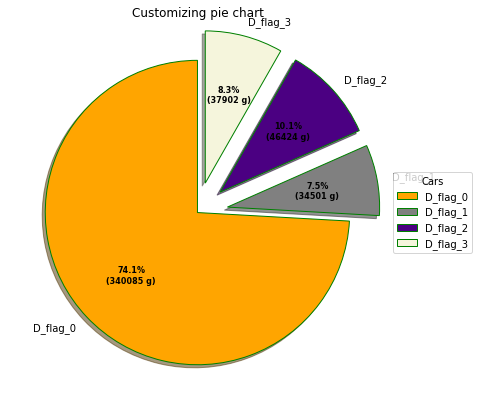

In [11]:
D_flag_0 = target[target['Default_Flag']==0].shape[0]
D_flag_1 = target[target['Default_Flag']==1].shape[0]
D_flag_2 = target[target['Default_Flag']==2].shape[0]
D_flag_3 = target[target['Default_Flag']==3].shape[0]

labels = ['D_flag_0','D_flag_1','D_flag_2','D_flag_3']
data = [D_flag_0, D_flag_1, D_flag_2, D_flag_3]

# Creating explode data
explode = (0.0, 0.2, 0.2, 0.2)
 
# Creating color parameters
colors = ( "orange", "grey", "indigo", "beige")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = labels,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
# Adding legend
ax.legend(wedges, labels,
          title ="Cars",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing pie chart")
 
# show plot
plt.show()

In [12]:
# As can be seen Default_Flag = 0 has 74% data so we need to treat the missing values of that category carefully

In [13]:
df_train['Default'] = target['Default_Flag']
df_train['Default'] = df_train['Default']

In [14]:
df_train.shape

(458913, 189)

In [15]:
null_data = df_train.isnull().sum().sort_values(ascending = False)
missing_ratio = 100.0*null_data/len(df_train)
missing_ratio = pd.DataFrame({'Percentage':missing_ratio})
null_val = missing_ratio[missing_ratio['Percentage']>60].index.values
len(null_val)

25

In [16]:
null_val

array(['D_17', 'D_38', 'D_43', 'D_96', 'D_39', 'B_7', 'D_73', 'B_22',
       'D_114', 'D_97', 'D_12', 'D_132', 'D_80', 'R_8', 'B_26', 'D_110',
       'R_7', 'D_11', 'D_95', 'D_105', 'D_48', 'D_141', 'D_142', 'D_10',
       'D_68'], dtype=object)

In [17]:
# Dropping all the columns having more than 80% missing values
df_train.drop(null_val,axis = 1,inplace = True)

In [18]:
df_train.shape

(458913, 164)

In [19]:
null_data_0 = df_train[df_train['Default']==0].isnull().sum().sort_values(ascending = False)
missing_ratio_0 = 100.0*null_data_0/len(df_train[df_train['Default']==0])
missing_ratio_0[missing_ratio_0>40]

B_29     65.111663
D_31     57.246571
D_92     53.196701
D_106    47.475484
S_23     40.627490
dtype: float64

In [20]:
null_data_1 = df_train[df_train['Default']==1].isnull().sum().sort_values(ascending = False)
missing_ratio_1 = 100.0*null_data_1/len(df_train[df_train['Default']==1])
missing_ratio_1[missing_ratio_1>40]

D_106    69.806672
D_133    69.055969
D_92     68.487870
D_31     43.891481
dtype: float64

In [21]:
null_data_2 = df_train[df_train['Default']==2].isnull().sum().sort_values(ascending = False)
missing_ratio_2 = 100.0*null_data_2/len(df_train[df_train['Default']==2])
missing_ratio_2[missing_ratio_2>40]

D_106    70.782354
D_92     68.781234
D_133    65.741858
D_31     42.169998
dtype: float64

In [22]:
null_data_3 = df_train[df_train['Default']==3].isnull().sum().sort_values(ascending = False)
missing_ratio_3 = 100.0*null_data_3/len(df_train[df_train['Default']==3])
missing_ratio_3[missing_ratio_3>40]

D_106    69.474712
D_92     67.965596
D_133    63.132206
D_31     42.727489
dtype: float64

In [23]:
num_val = df_train.select_dtypes(exclude = ['object']).columns.values
num_val

array(['B_37', 'S_24', 'S_4', 'S_14', 'B_25', 'B_30', 'D_138', 'P_2',
       'S_7', 'S_25', 'S_12', 'D_99', 'B_28', 'S_21', 'B_42', 'B_17',
       'B_1', 'B_31', 'B_33', 'B_3', 'B_19', 'B_12', 'D_121', 'D_107',
       'D_79', 'B_21', 'B_29', 'D_60', 'B_5', 'B_9', 'B_10', 'B_18',
       'D_122', 'B_4', 'B_40', 'B_32', 'D_2', 'S_20', 'S_13', 'R_24',
       'P_3', 'R_25', 'B_14', 'D_15', 'D_89', 'D_8', 'P_1', 'D_74',
       'S_15', 'S_23', 'D_106', 'B_20', 'B_35', 'D_19', 'D_88', 'D_34',
       'B_24', 'D_98', 'D_92', 'D_25', 'D_59', 'S_3', 'D_126', 'B_8',
       'B_6', 'B_38', 'R_26', 'R_27', 'R_10', 'R_23', 'R_2', 'R_17',
       'R_18', 'R_15', 'R_20', 'R_12', 'R_3', 'R_4', 'D_1', 'D_90',
       'D_67', 'B_41', 'S_22', 'R_6', 'R_22', 'R_21', 'R_14', 'R_16',
       'R_13', 'R_19', 'B_36', 'D_40', 'D_27', 'D_64', 'D_133', 'D_50',
       'S_9', 'D_69', 'D_65', 'D_129', 'D_22', 'B_23', 'R_11', 'D_6',
       'D_56', 'D_100', 'B_2', 'B_13', 'S_16', 'S_8', 'S_11', 'S_26',
       'D_87', 'D_51'

In [24]:
obj_val = df_train.select_dtypes(include = ['object']).columns.values
obj_val

array(['D_36', 'D_44'], dtype=object)

In [25]:
Train = df_train[num_val]

In [26]:
Train.isnull().sum().sort_values(ascending = False)

D_92       262235
D_31       245602
D_106      244734
B_29       244471
D_133      213837
            ...  
R_2             0
R_23            0
R_10            0
R_27            0
Default         0
Length: 162, dtype: int64

In [27]:
for i in range(4):
    null_data = Train[Train['Default']==i].isnull().sum(axis = 1).sort_values(ascending = False)
    n_rows = null_data[null_data==0].index.values
    Train1 = Train.iloc[n_rows]
    n_col = Train.columns.values
    for j in n_col:
        Train[j].fillna(Train1[j].median(),inplace = True) 

In [28]:
Train.isnull().sum().sort_values(ascending = False)

B_37       0
D_135      0
D_6        0
D_56       0
D_100      0
          ..
D_34       0
B_24       0
D_98       0
D_92       0
Default    0
Length: 162, dtype: int64

In [29]:
for i in obj_val:
    Train[i] = df_train[i]

In [30]:
Train.shape

(458913, 164)

In [31]:
Train.isnull().sum().sort_values(ascending = False)

D_44     10037
D_6          0
D_100        0
B_2          0
B_13         0
         ...  
D_34         0
B_24         0
D_98         0
D_92         0
S_22         0
Length: 164, dtype: int64

In [32]:
Train['D_44'].fillna('O',inplace = True)

In [33]:
Train.isnull().sum().sort_values(ascending = False)

B_37     0
D_6      0
D_100    0
B_2      0
B_13     0
        ..
D_34     0
B_24     0
D_98     0
D_92     0
D_44     0
Length: 164, dtype: int64

In [34]:
Data_D_36 = Train['D_36'].values
Data_D_44 = Train['D_44'].values

In [35]:
Data = pd.DataFrame(Data_D_36,columns = ['D_36'])

In [36]:
Data['D_44'] = Data_D_44

In [37]:
Data.head(5)

,D_36,D_44
0,CO,O
1,CL,O
2,CO,O
3,CR,O
4,XM,O


In [38]:
y = Train['Default'].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
df_corr = Train.corr()
Threshold = np.abs(df_corr['Default']).sort_values(ascending = False)

In [40]:
# Features of B category whose absolute co-relation value with the target variable is greater than or equal to 0.25
B_corr = Threshold.filter(like='B_')
B_Imp = B_corr[B_corr>=0.05].sort_values(ascending = False).index.values
print(B_Imp,'\n')
print('No. of B category features:',len(B_Imp))
print(100*'-')
# Features of B category whose absolute co-relation value with the target variable is less than 0.25
B_corr = Threshold.filter(like='B_')
b_Imp = B_corr[B_corr<0.05].sort_values(ascending = False).index.values
print(b_Imp,'\n')
print('No. of B category features:',len(b_Imp))

['B_9' 'B_25' 'B_30' 'B_5' 'B_10' 'B_32' 'B_35' 'B_18' 'B_17' 'B_3' 'B_13'
 'B_19' 'B_36' 'B_11' 'B_42' 'B_20' 'B_12' 'B_14' 'B_23' 'B_6' 'B_29'
 'B_37' 'B_2' 'B_38' 'B_15' 'B_24' 'B_28' 'B_40' 'B_41'] 

No. of B category features: 29
----------------------------------------------------------------------------------------------------
['B_34' 'B_39' 'B_1' 'B_21' 'B_4' 'B_31' 'B_33' 'B_8'] 

No. of B category features: 8


In [41]:
# Features of D category whose absolute co-relation value with the target variable is greater than or equal to 0.25
D_corr = Threshold.filter(like='D_')
D_Imp = D_corr[D_corr >=0.05].sort_values(ascending = False).index.values
print(D_Imp,'\n')
print('No. of D category features:',len(D_Imp))
print(100*'-')
# Features of D category whose absolute co-relation value with the target variable is less than 0.25
D_corr = Threshold.filter(like='D_')
d_Imp = D_corr[D_corr<0.05].sort_values(ascending = False).index.values
print(d_Imp,'\n')
print('No. of D category features:',len(d_Imp))

['D_40' 'D_22' 'D_99' 'D_2' 'D_129' 'D_56' 'D_50' 'D_64' 'D_65' 'D_138'
 'D_89' 'D_107' 'D_1' 'D_6' 'D_18' 'D_93' 'D_133' 'D_120' 'D_121' 'D_67'
 'D_74' 'D_23' 'D_90' 'D_59' 'D_29' 'D_55' 'D_98' 'D_70' 'D_100' 'D_124'
 'D_19' 'D_49' 'D_26' 'D_54' 'D_60' 'D_20' 'D_9' 'D_52' 'D_8' 'D_5' 'D_79'
 'D_139' 'D_135' 'D_7' 'D_4' 'D_123' 'D_108' 'D_117' 'D_84' 'D_51' 'D_47'
 'D_87' 'D_126' 'D_106' 'D_25' 'D_27' 'D_34' 'D_78' 'D_91' 'D_85' 'D_15'
 'D_69' 'D_32' 'D_130'] 

No. of D category features: 64
----------------------------------------------------------------------------------------------------
['D_92' 'D_122' 'D_102' 'D_83' 'D_42' 'D_61' 'D_101' 'D_88' 'D_31' 'D_86'] 

No. of D category features: 10


In [42]:
# Features of P category whose absolute co-relation value with the target variable is greater than or equal to 0.25
P_corr = Threshold.filter(like='P_')
P_Imp = P_corr[P_corr>=0.05].sort_values(ascending = False).index.values
print(P_Imp,'\n')
print('No. of P category features:',len(P_Imp))
print(100*'-')
# Features of B category whose absolute co-relation value with the target variable is less than 0.25
P_corr = Threshold.filter(like='P_')
p_Imp = P_corr[P_corr<0.05].sort_values(ascending = False).index.values
print(p_Imp,'\n')
print('No. of P category features:',len(p_Imp))

['P_2' 'P_1' 'P_3'] 

No. of P category features: 3
----------------------------------------------------------------------------------------------------
[] 

No. of P category features: 0


In [43]:
# Features of R category whose absolute co-relation value with the target variable is greater than or equal to 0.25
R_corr = Threshold.filter(like='R_')
R_Imp = R_corr[R_corr>=0.05].sort_values(ascending = False).index.values
print(R_Imp,'\n')
print('No. of R category features:',len(R_Imp))
print(100*'-','\n')
# Features of R category whose absolute co-relation value with the target variable is less than 0.25
R_corr = Threshold.filter(like='R_')
r_Imp = R_corr[R_corr<0.05].sort_values(ascending = False).index.values
print(r_Imp,'\n')
print('No. of R category features:',len(r_Imp))

['R_13' 'R_24' 'R_11' 'R_5' 'R_19' 'R_3' 'R_28' 'R_23' 'R_6' 'R_25' 'R_22'
 'R_26' 'R_4' 'R_27' 'R_14' 'R_20' 'R_17' 'R_10' 'R_18' 'R_2' 'R_16' 'R_9'] 

No. of R category features: 22
---------------------------------------------------------------------------------------------------- 

['R_12' 'R_1' 'R_21' 'R_15'] 

No. of R category features: 4


In [44]:
# Features of S category whose absolute co-relation value with the target variable is greater than or equal to 0.25
S_corr = Threshold.filter(like='S_')
S_Imp = S_corr[S_corr>=0.05].sort_values(ascending = False).index.values
print(S_Imp,'\n')
print('No. of S category features:',len(S_Imp))
print(100*'-')
# Features of S category whose absolute co-relation value with the target variable is less than 0.25
S_corr = Threshold.filter(like='S_')
s_Imp = S_corr[S_corr<0.05].sort_values(ascending = False).index.values
print(s_Imp,'\n')
print('No. of S category features:',len(s_Imp))

['S_25' 'S_7' 'S_8' 'S_20' 'S_4' 'S_14' 'S_5' 'S_22' 'S_11' 'S_13' 'S_26'
 'S_16' 'S_19' 'S_12'] 

No. of S category features: 14
----------------------------------------------------------------------------------------------------
['S_2' 'S_23' 'S_3' 'S_21' 'S_24' 'S_15' 'S_9'] 

No. of S category features: 7


In [45]:
imp_features = []
for i in B_Imp:
    imp_features.append(i)
for i in D_Imp:
    imp_features.append(i)
for i in P_Imp:
    imp_features.append(i)
for i in R_Imp:
    imp_features.append(i)
for i in S_Imp:
    imp_features.append(i)

In [46]:
Train = Train[imp_features]
Train['D_44'] = Data['D_44']
Train['D_36'] = Data['D_36']

In [47]:
Train.shape

(458913, 134)

**Outliers Detection and Imputation**

---
**Q: What is the outlier value plot for B Variable?**

---

In [53]:
b_columns = Train.filter(like = 'B_').columns.values
b_columns

array(['B_9', 'B_25', 'B_30', 'B_5', 'B_10', 'B_32', 'B_35', 'B_18',
       'B_17', 'B_3', 'B_13', 'B_19', 'B_36', 'B_11', 'B_42', 'B_20',
       'B_12', 'B_14', 'B_23', 'B_6', 'B_29', 'B_37', 'B_2', 'B_38',
       'B_15', 'B_24', 'B_28', 'B_40', 'B_41'], dtype=object)

In [54]:
len(b_columns)

29

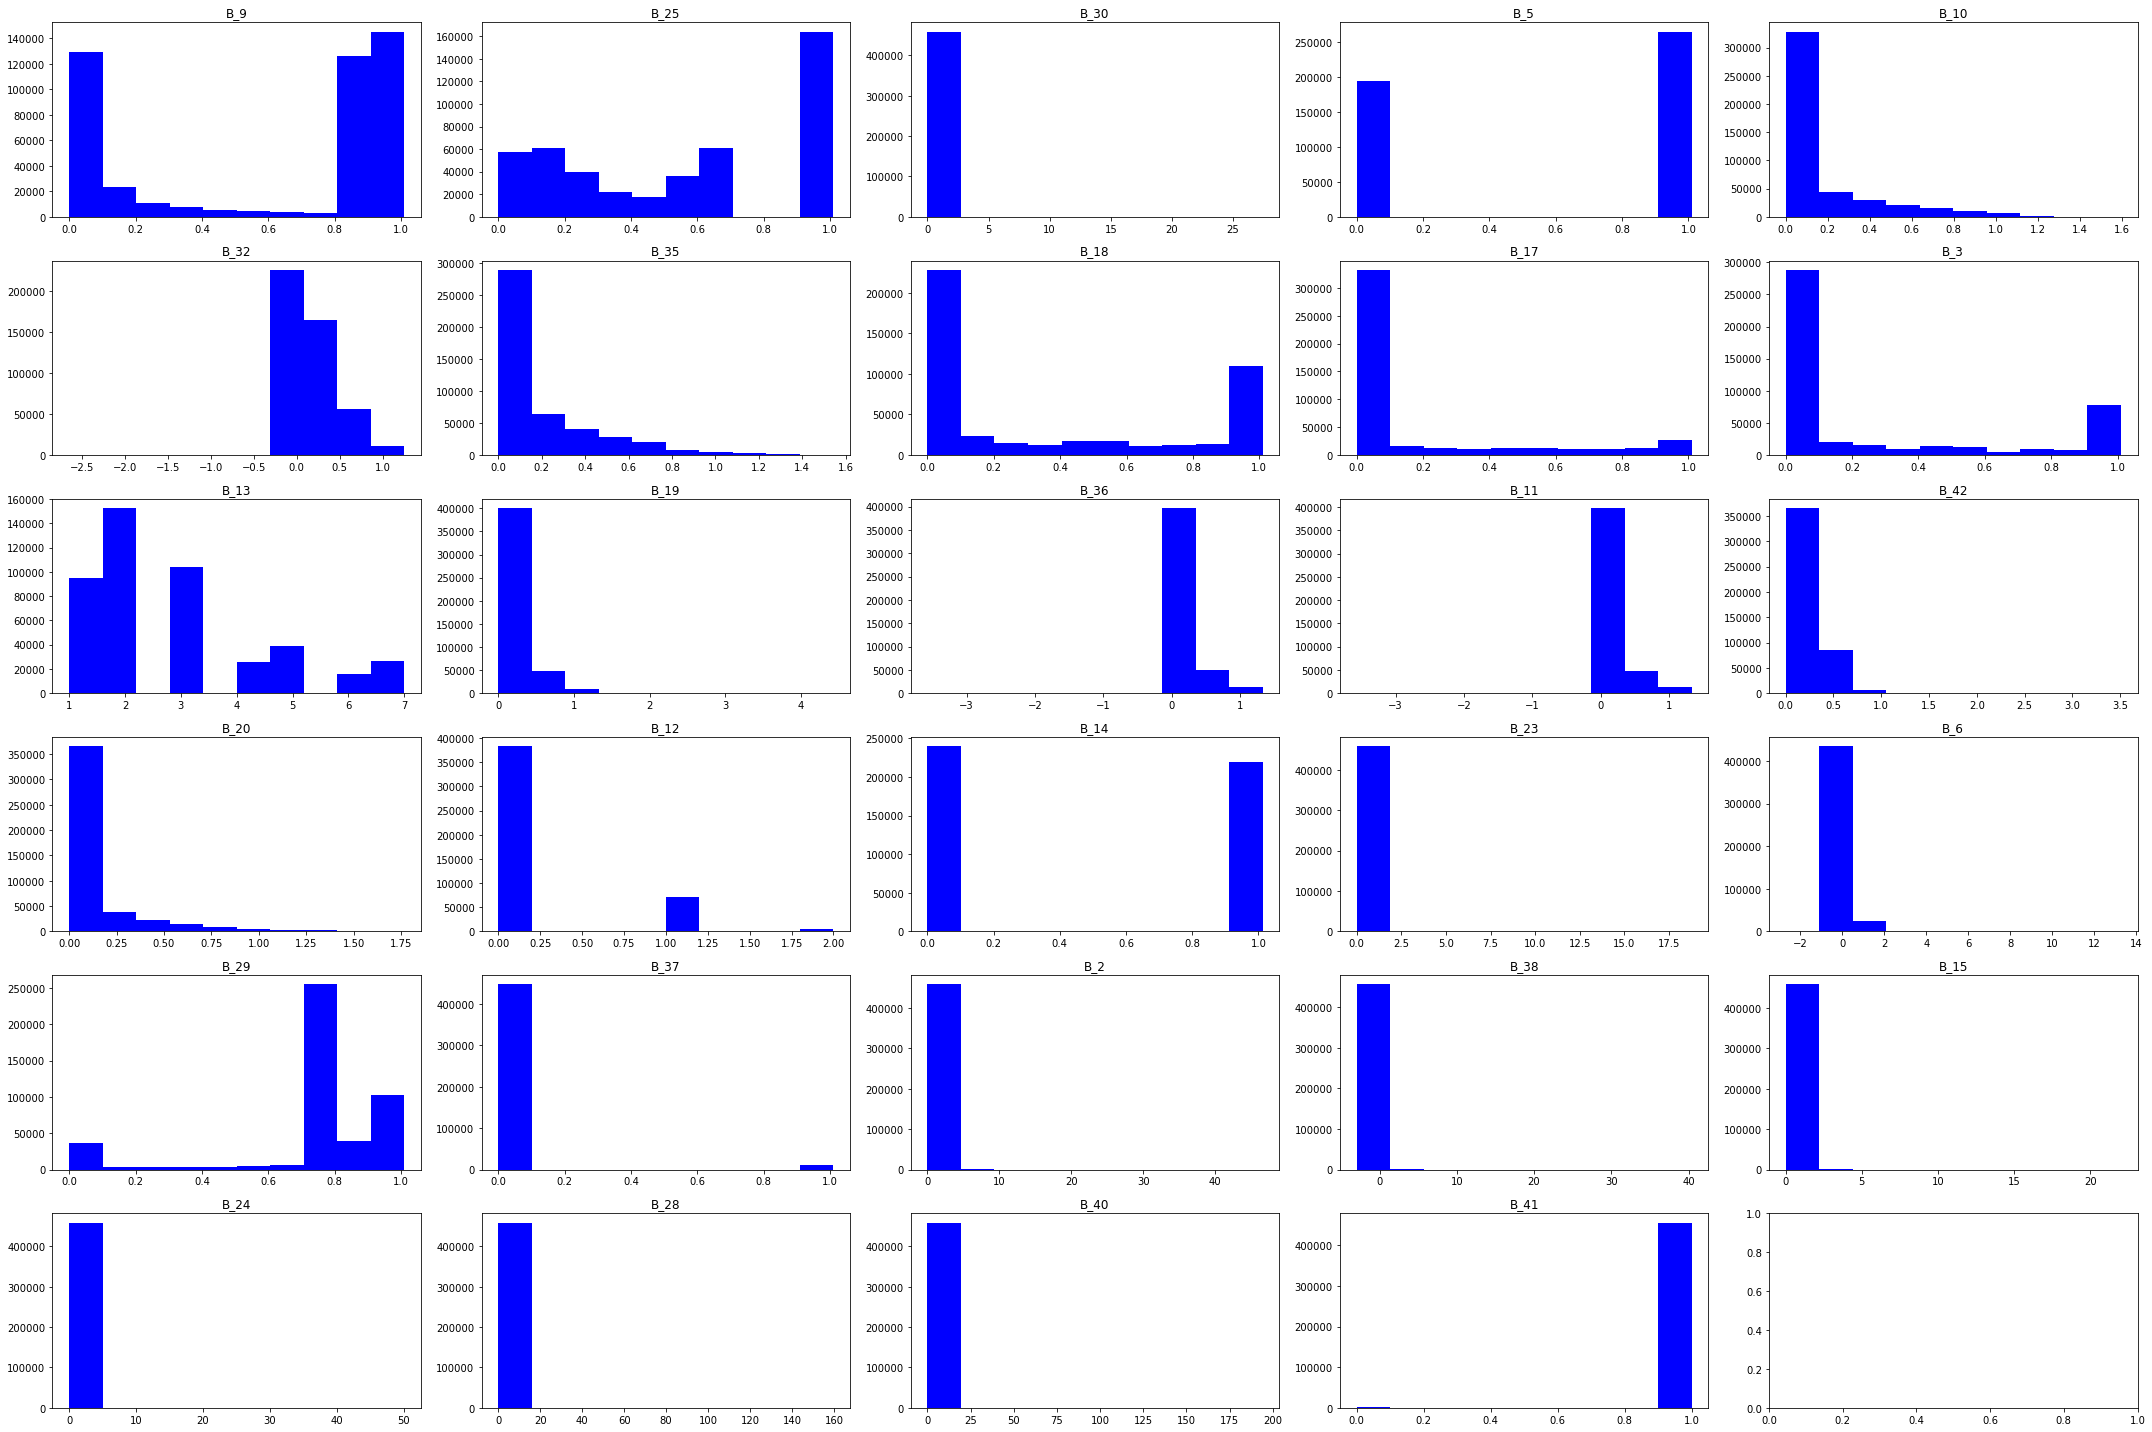

In [77]:
#plot distribution for B variables
nrows=6
ncols=5
fig, axes = plt.subplots(nrows, ncols, figsize=(30,20)) 

axes = axes.flatten()   
for ax,col in zip(axes,b_columns):
    ax.hist(Train[col],color='blue')
    ax.set_title(col)
    
plt.tight_layout()

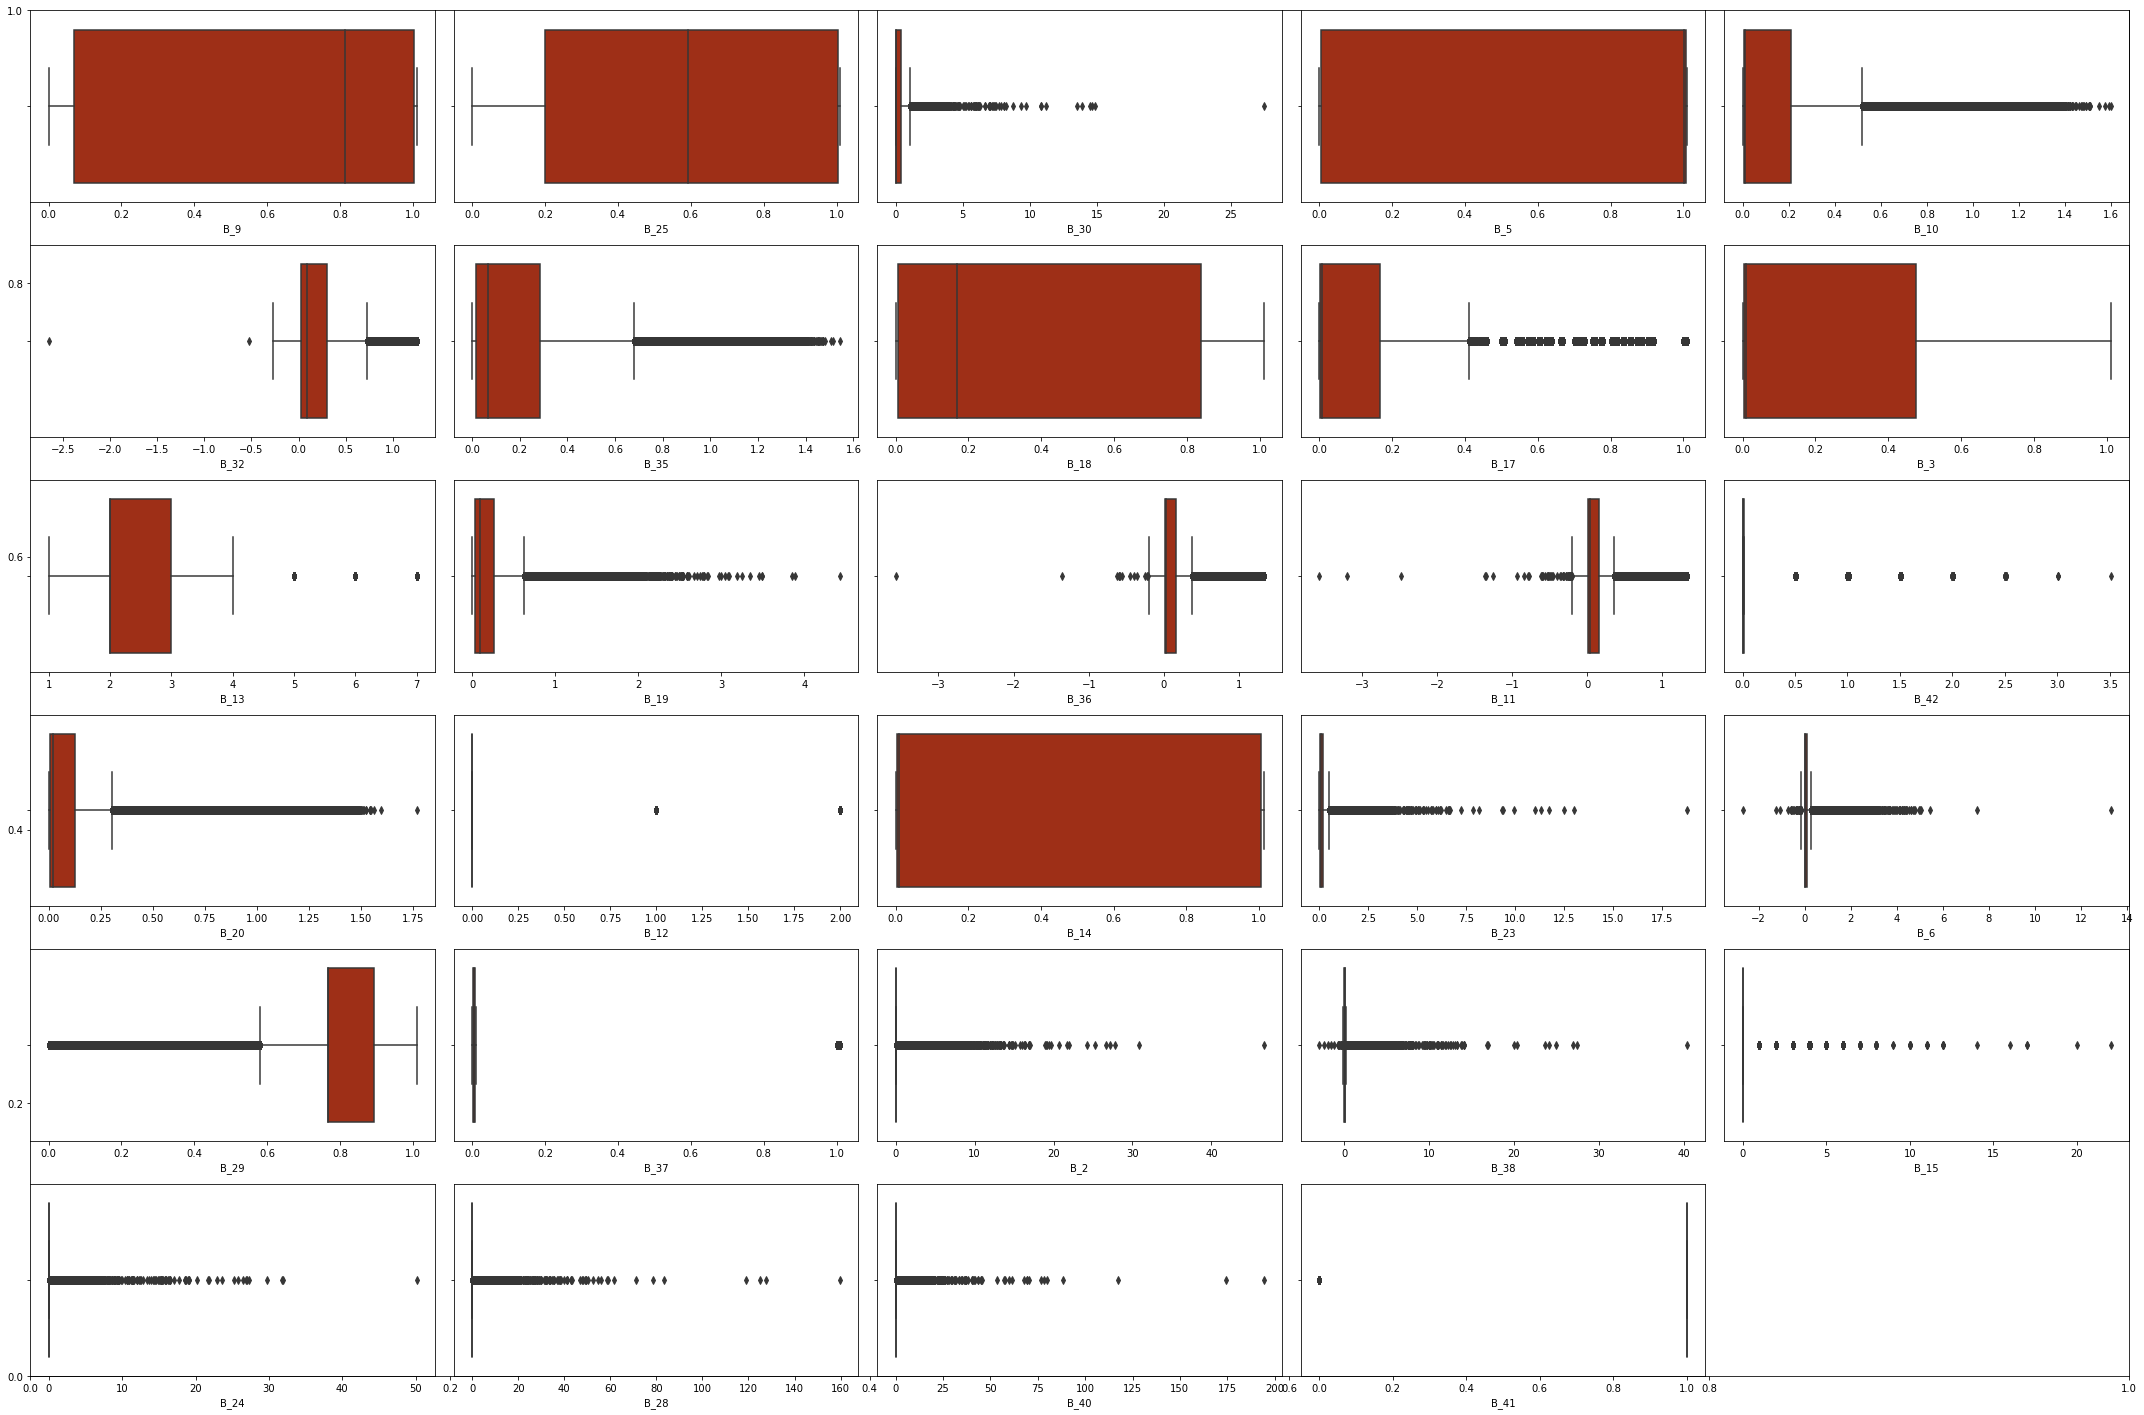

In [78]:
#plot outlier for B variables
nrows = 6
ncols = 5
fig, axes = plt.subplots(figsize=(30,20)) 
for i, col in enumerate(b_columns):
    ax=fig.add_subplot(nrows, ncols, i+1)
    sns.boxplot(x=Train[col], ax=ax,palette='gnuplot')
    
fig.tight_layout()  
plt.show()

---
**Q: What is the outlier value plot for D Variable?**

---

In [79]:
d_columns = Train.filter(like = 'D_').columns.values
d_columns

array(['D_40', 'D_22', 'D_99', 'D_2', 'D_129', 'D_56', 'D_50', 'D_64',
       'D_65', 'D_138', 'D_89', 'D_107', 'D_1', 'D_6', 'D_18', 'D_93',
       'D_133', 'D_120', 'D_121', 'D_67', 'D_74', 'D_23', 'D_90', 'D_59',
       'D_29', 'D_55', 'D_98', 'D_70', 'D_100', 'D_124', 'D_19', 'D_49',
       'D_26', 'D_54', 'D_60', 'D_20', 'D_9', 'D_52', 'D_8', 'D_5',
       'D_79', 'D_139', 'D_135', 'D_7', 'D_4', 'D_123', 'D_108', 'D_117',
       'D_84', 'D_51', 'D_47', 'D_87', 'D_126', 'D_106', 'D_25', 'D_27',
       'D_34', 'D_78', 'D_91', 'D_85', 'D_15', 'D_69', 'D_32', 'D_130',
       'D_44', 'D_36'], dtype=object)

In [83]:
d_columns = ['D_40', 'D_22', 'D_99', 'D_2', 'D_129', 'D_56', 'D_50', 'D_64',
       'D_65', 'D_138', 'D_89', 'D_107', 'D_1', 'D_6', 'D_18', 'D_93',
       'D_133', 'D_120', 'D_121', 'D_67', 'D_74', 'D_23', 'D_90', 'D_59',
       'D_29', 'D_55', 'D_98', 'D_70', 'D_100', 'D_124', 'D_19', 'D_49',
       'D_26', 'D_54', 'D_60', 'D_20', 'D_9', 'D_52', 'D_8', 'D_5',
       'D_79', 'D_139', 'D_135', 'D_7', 'D_4', 'D_123', 'D_108', 'D_117',
       'D_84', 'D_51', 'D_47', 'D_87', 'D_126', 'D_106', 'D_25', 'D_27',
       'D_34', 'D_78', 'D_91', 'D_85', 'D_15', 'D_69', 'D_32', 'D_130']

In [84]:
len(d_columns)

64

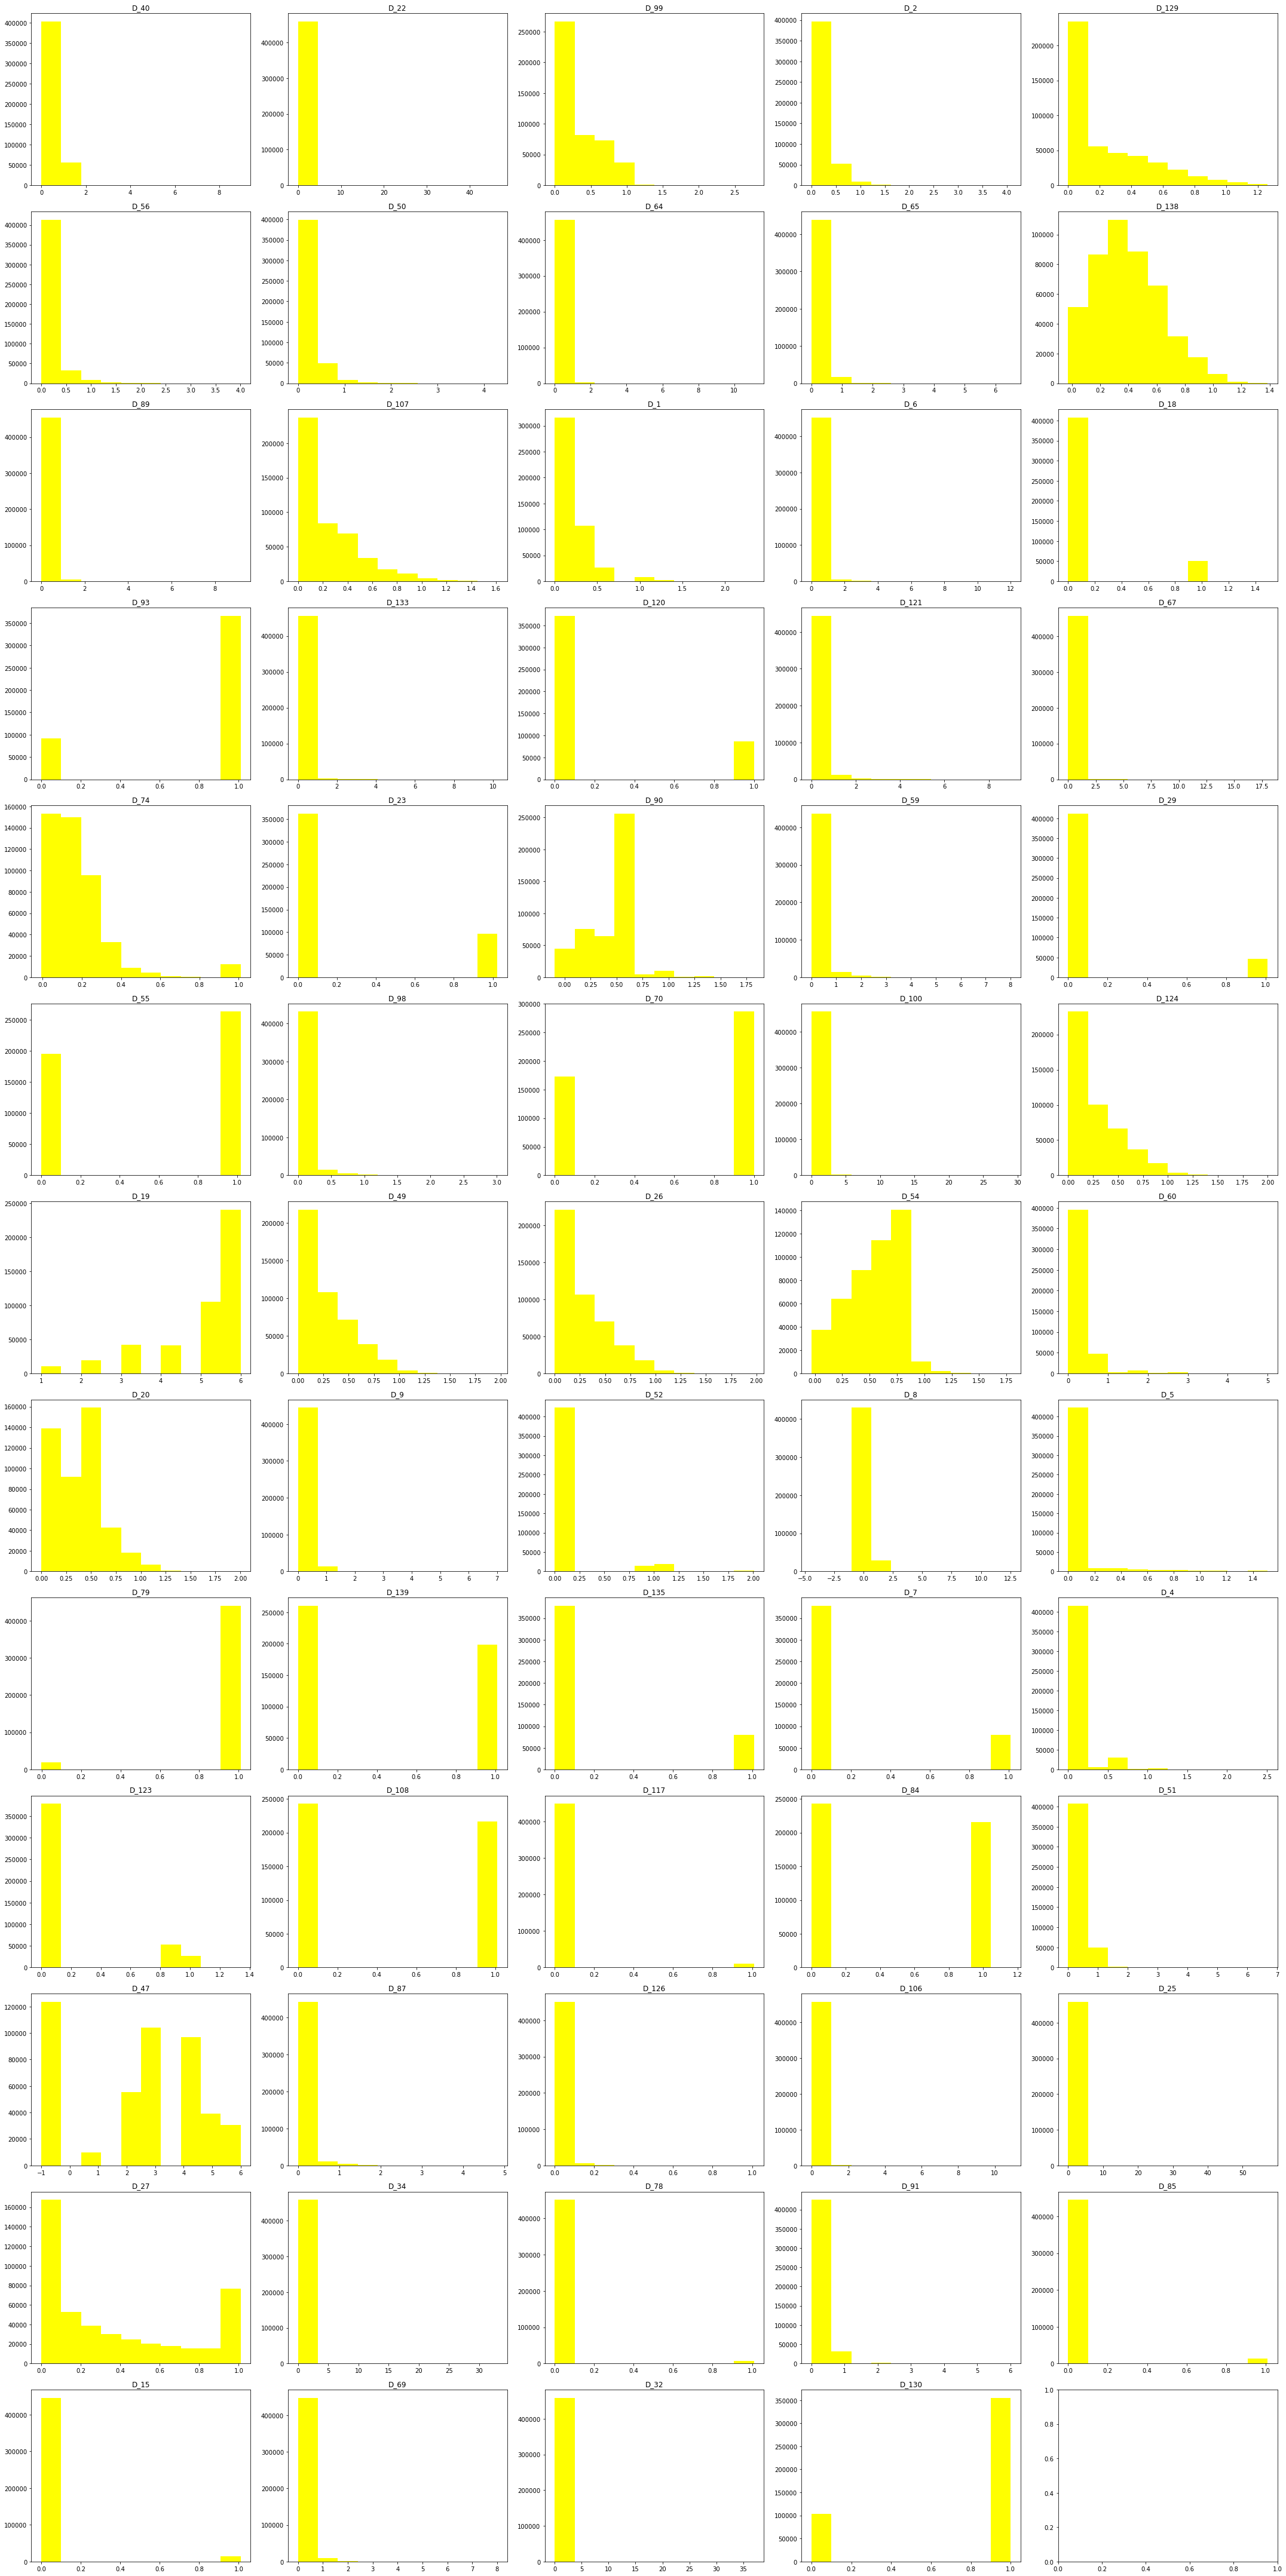

In [85]:
#plot distribution for D variables
nrows=13
ncols=5
fig, axes = plt.subplots(nrows, ncols, figsize=(30,60)) 

axes = axes.flatten()   
for ax,col in zip(axes,d_columns):
    ax.hist(Train[col],color='yellow')
    ax.set_title(col)
    
plt.tight_layout()

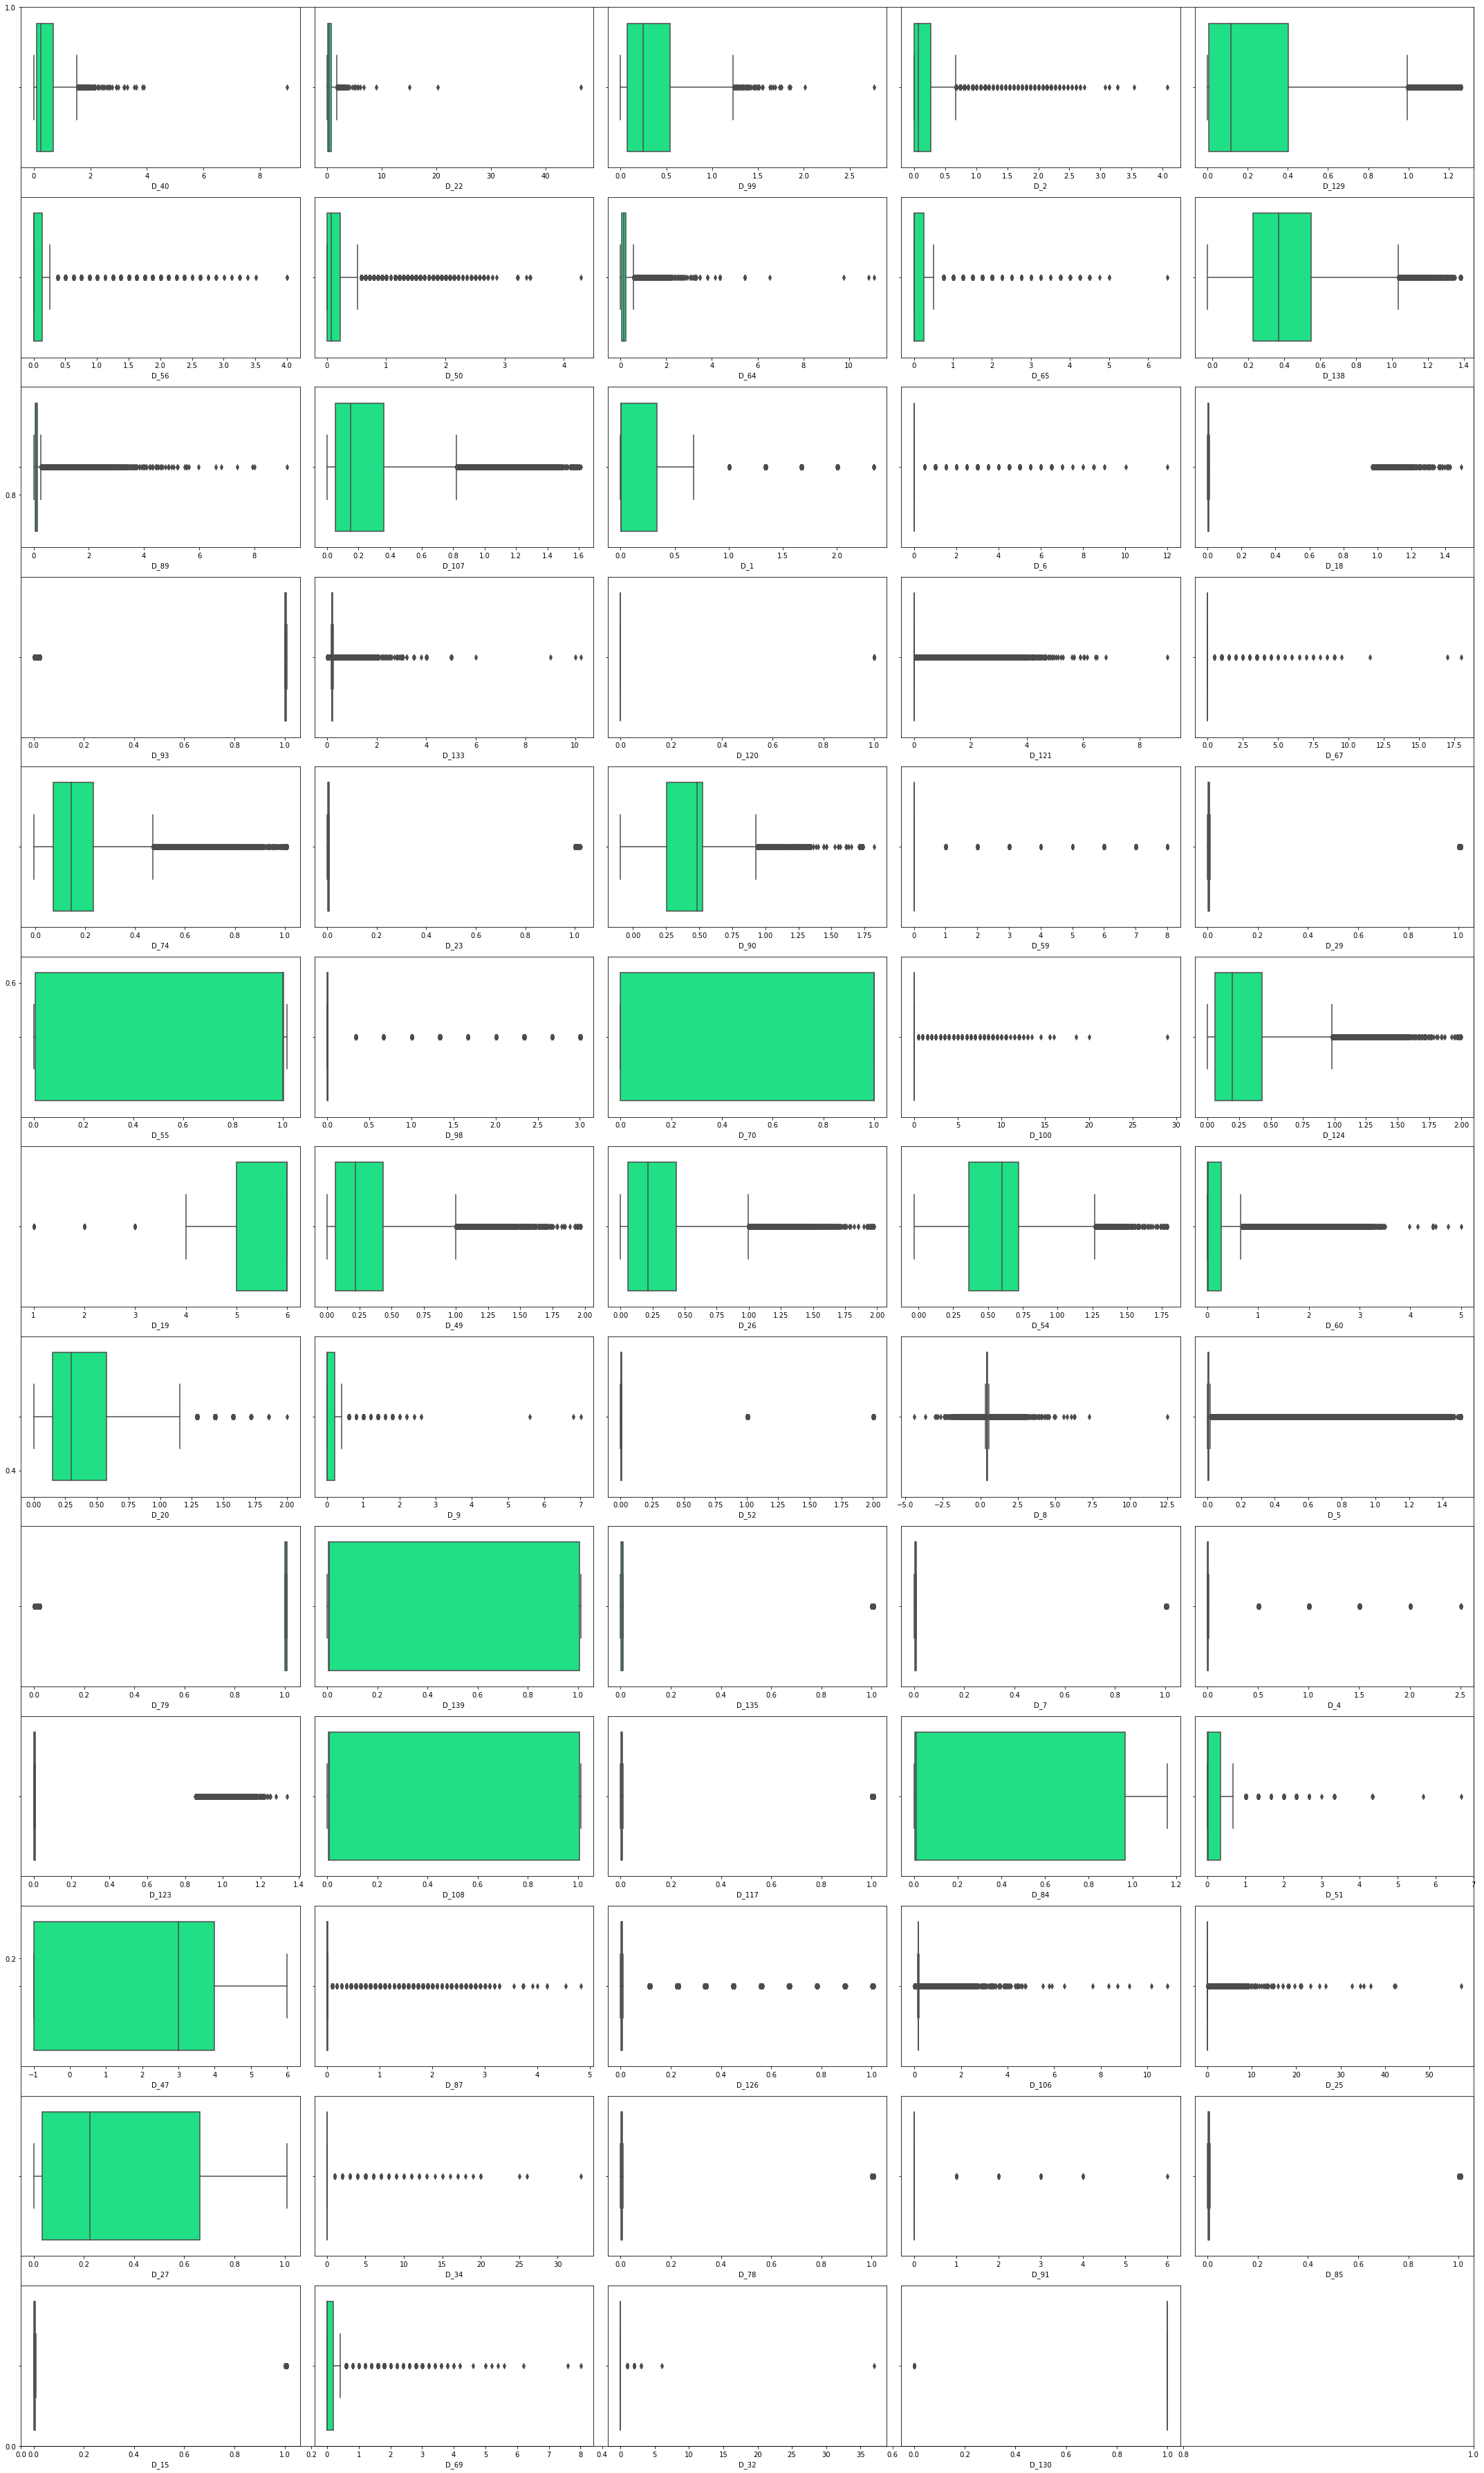

In [86]:
#plot outlier for D variables
nrows = 13
ncols = 5
fig, axes = plt.subplots(figsize=(30,50)) 
for i, col in enumerate(d_columns):
    ax=fig.add_subplot(nrows, ncols, i+1)
    sns.boxplot(x=Train[col], ax=ax,palette='gist_rainbow_r')
    
fig.tight_layout()  
plt.show()

---
**Q: What is the distribution for P Variable?**

---

In [87]:
p_columns = Train.filter(like = 'P_').columns.values
p_columns

array(['P_2', 'P_1', 'P_3'], dtype=object)

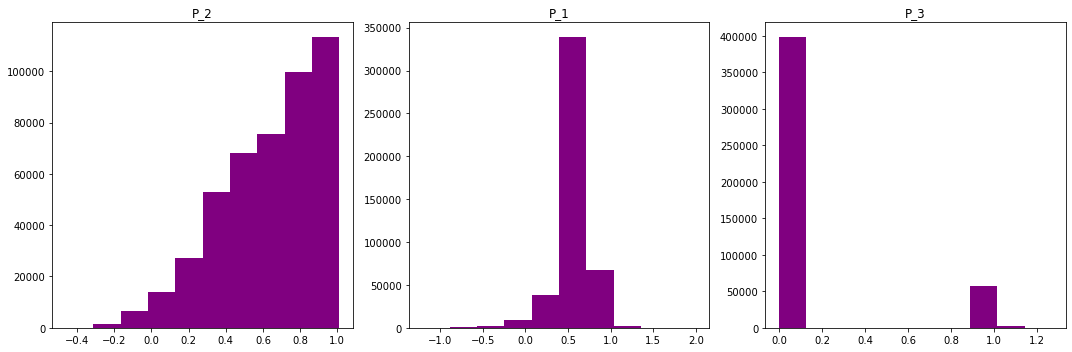

In [88]:
#plot distribution for P variables
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5)) 
axes = axes.flatten()   
for ax,col in zip(axes,p_columns):
    ax.hist(Train[col], color="purple")
    ax.set_title(col)
    
plt.tight_layout()

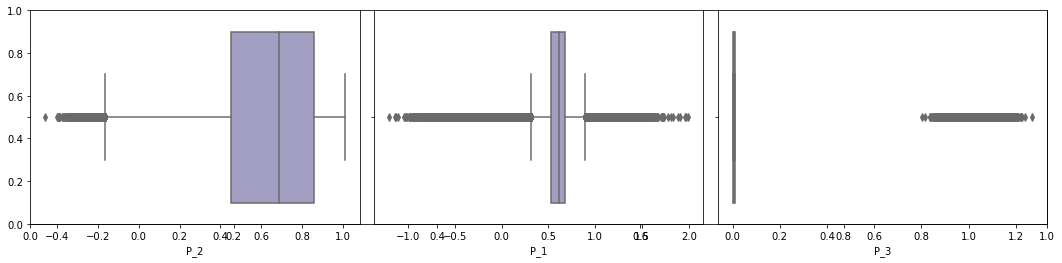

In [89]:
#plot outlier for P variables
nrows = 1
ncols = 3
fig, axes = plt.subplots(figsize=(15,4)) 
for i, col in enumerate(p_columns):
    ax=fig.add_subplot(nrows, ncols, i+1)
    sns.boxplot(x=Train[col], ax=ax,palette="Purples")
    
fig.tight_layout()  
plt.show()

---
**Q: What is the distribution for R Variable?**

---

In [90]:
r_columns = Train.filter(like = 'R_').columns.values
r_columns

array(['R_13', 'R_24', 'R_11', 'R_5', 'R_19', 'R_3', 'R_28', 'R_23',
       'R_6', 'R_25', 'R_22', 'R_26', 'R_4', 'R_27', 'R_14', 'R_20',
       'R_17', 'R_10', 'R_18', 'R_2', 'R_16', 'R_9'], dtype=object)

In [91]:
len(r_columns)

22

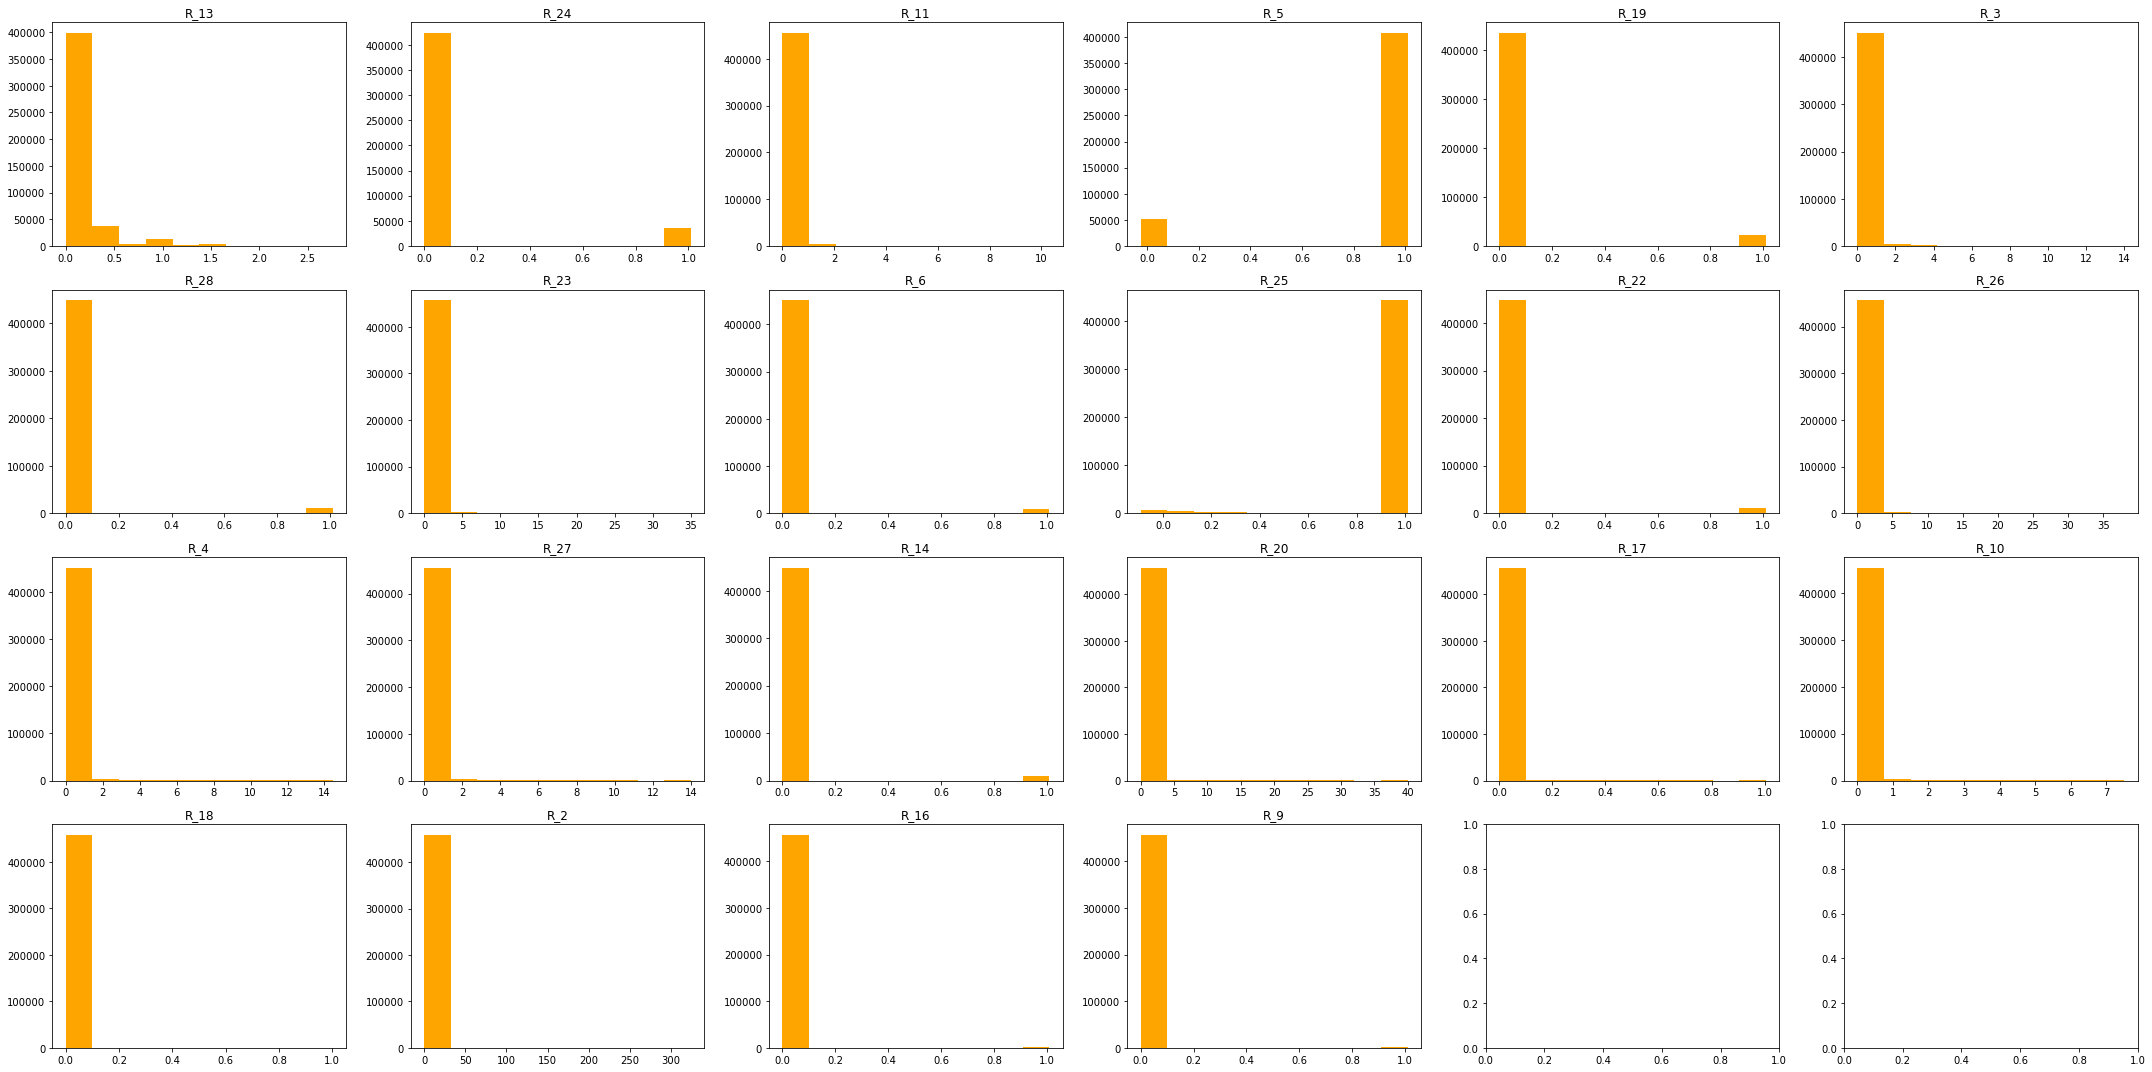

In [92]:
#plot distribution for R variables
fig, axes = plt.subplots(nrows = 4, ncols = 6, figsize=(30,15)) 
axes = axes.flatten()   
#train_df_sample = train_df.sample(frac =.1)
for ax,col in zip(axes,r_columns):
    ax.hist(Train[col], color="orange")
    ax.set_title(col)
    
plt.tight_layout()

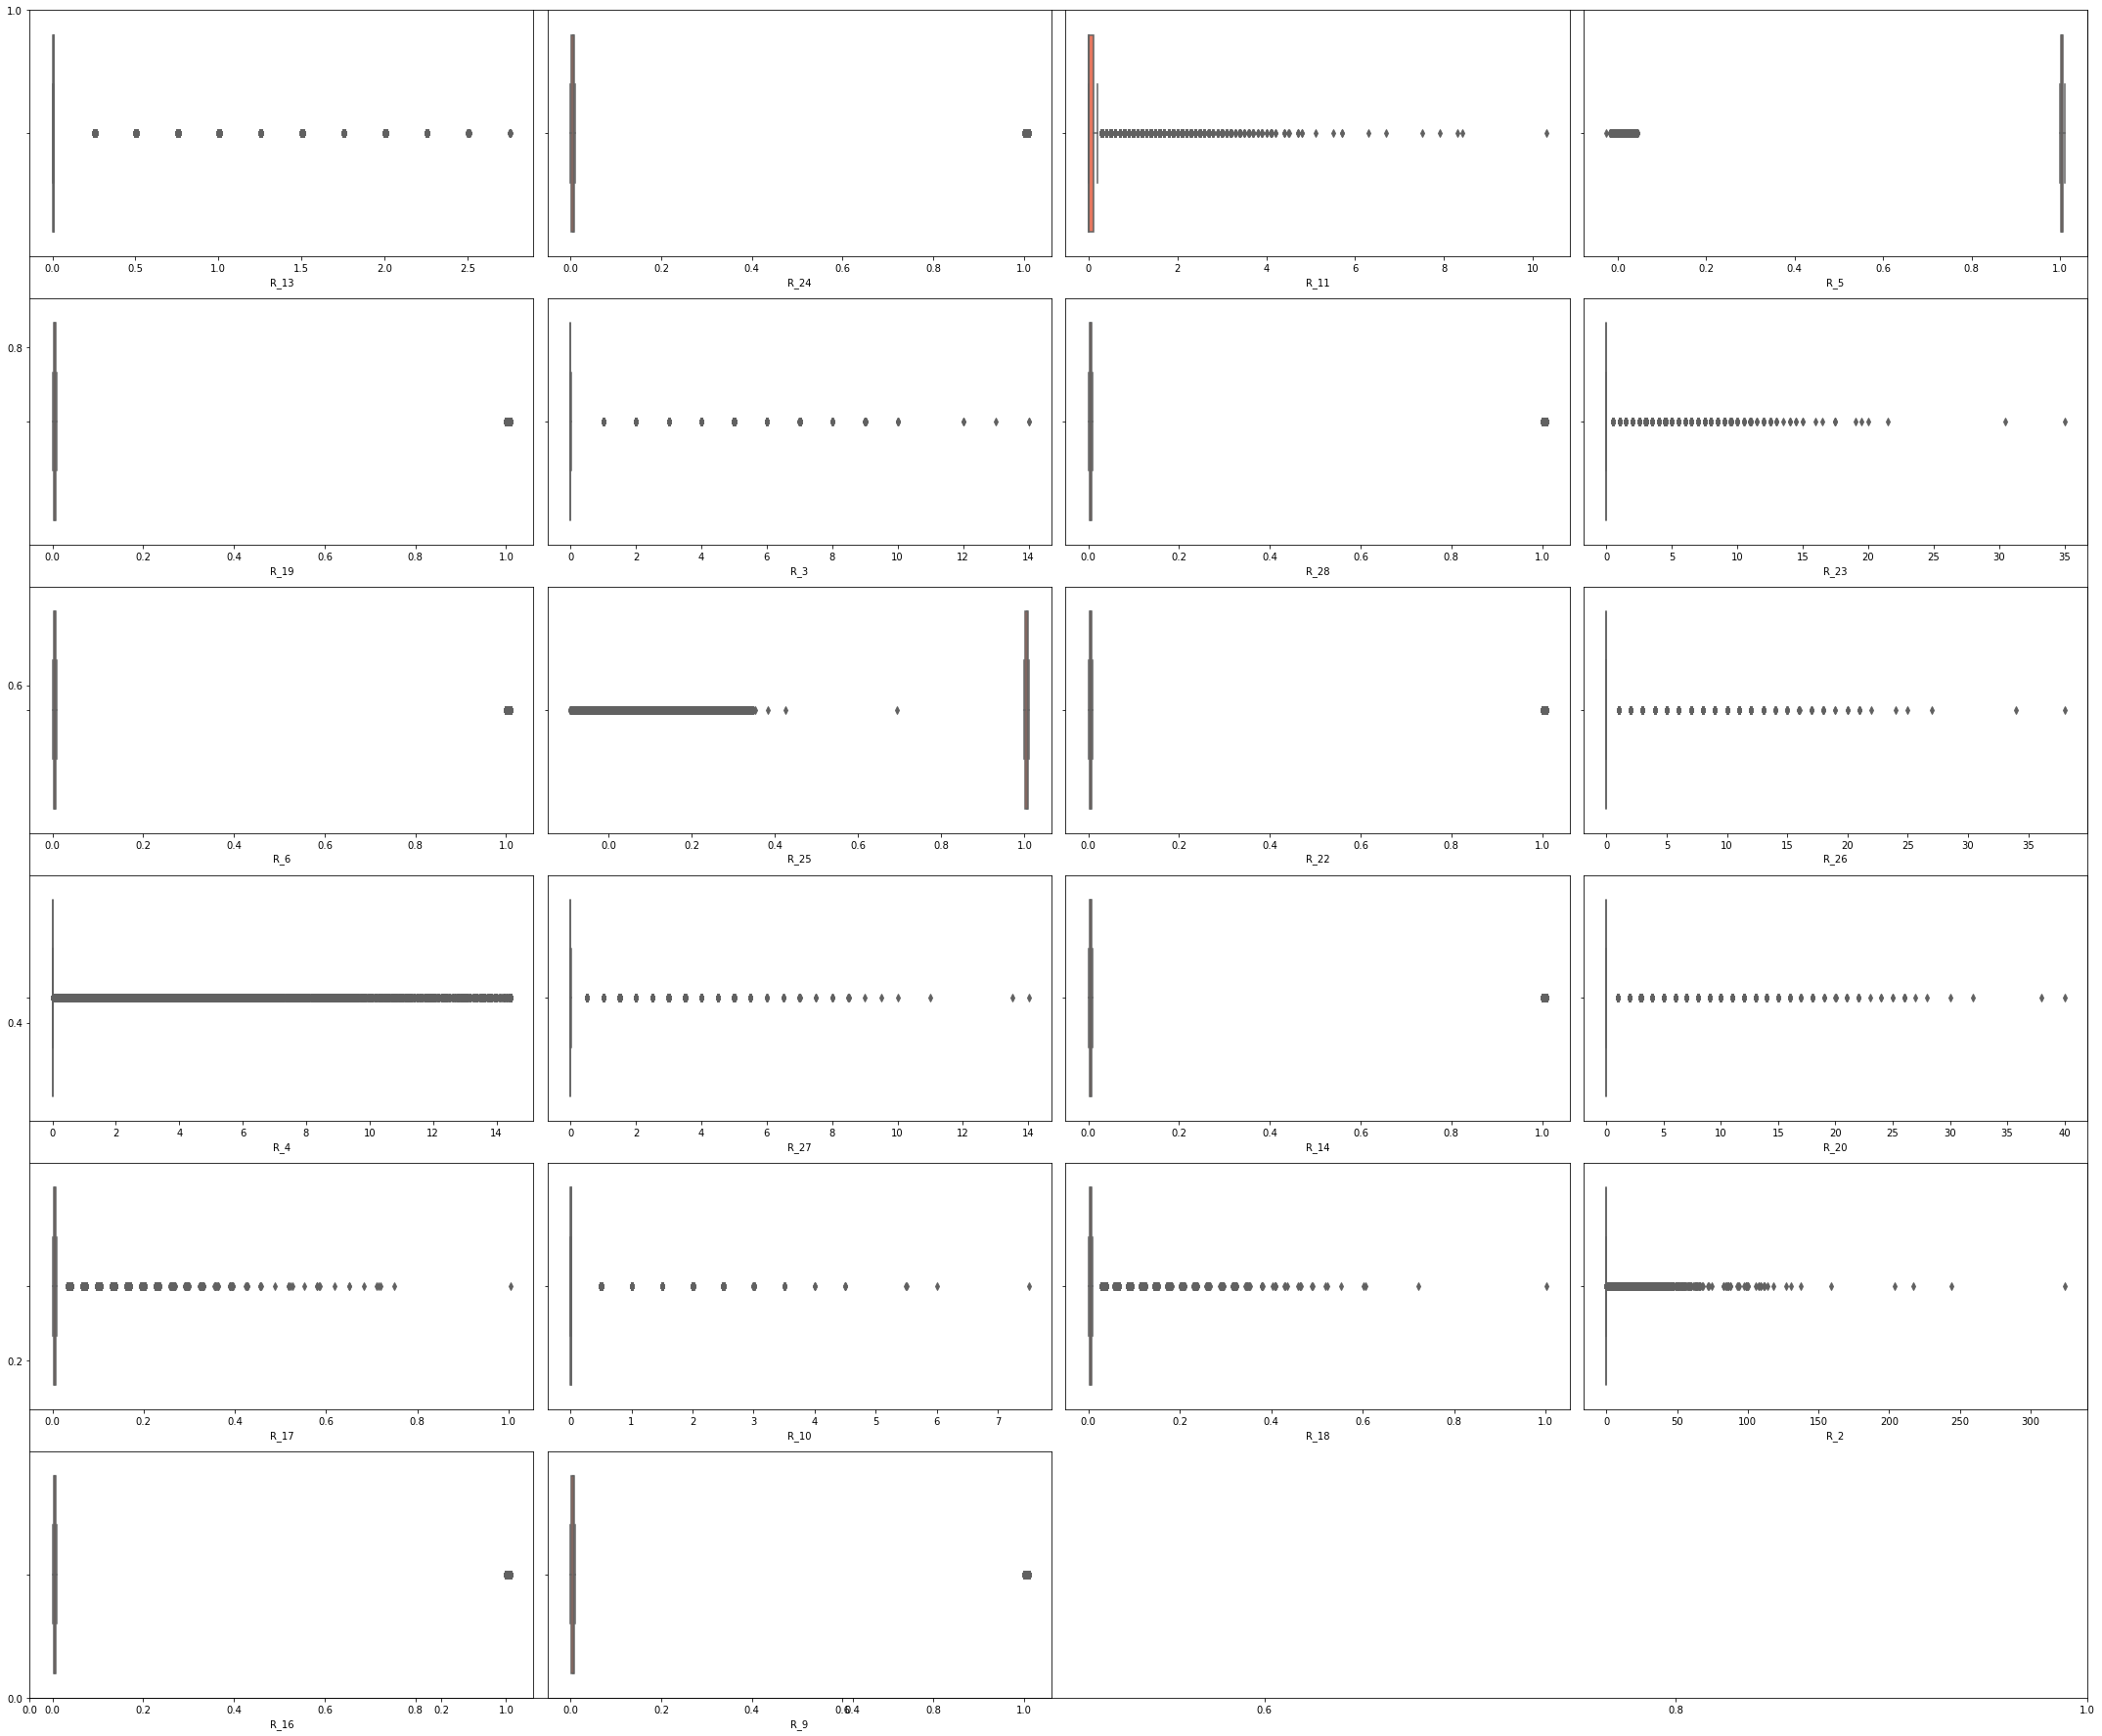

In [93]:
#plot outlier for R variables
nrows = 6
ncols = 4
fig, axes = plt.subplots(figsize=(30,25)) 

for i, col in enumerate(r_columns):
    ax=fig.add_subplot(nrows, ncols, i+1)
    sns.boxplot(x=Train[col], ax=ax, palette="Reds")
    
fig.tight_layout()  
plt.show()

---
**Q: What is the distribution for S Variable?**

---

In [94]:
s_columns = Train.filter(like = 'S_').columns.values
s_columns

array(['S_25', 'S_7', 'S_8', 'S_20', 'S_4', 'S_14', 'S_5', 'S_22', 'S_11',
       'S_13', 'S_26', 'S_16', 'S_19', 'S_12'], dtype=object)

In [95]:
len(s_columns)

14

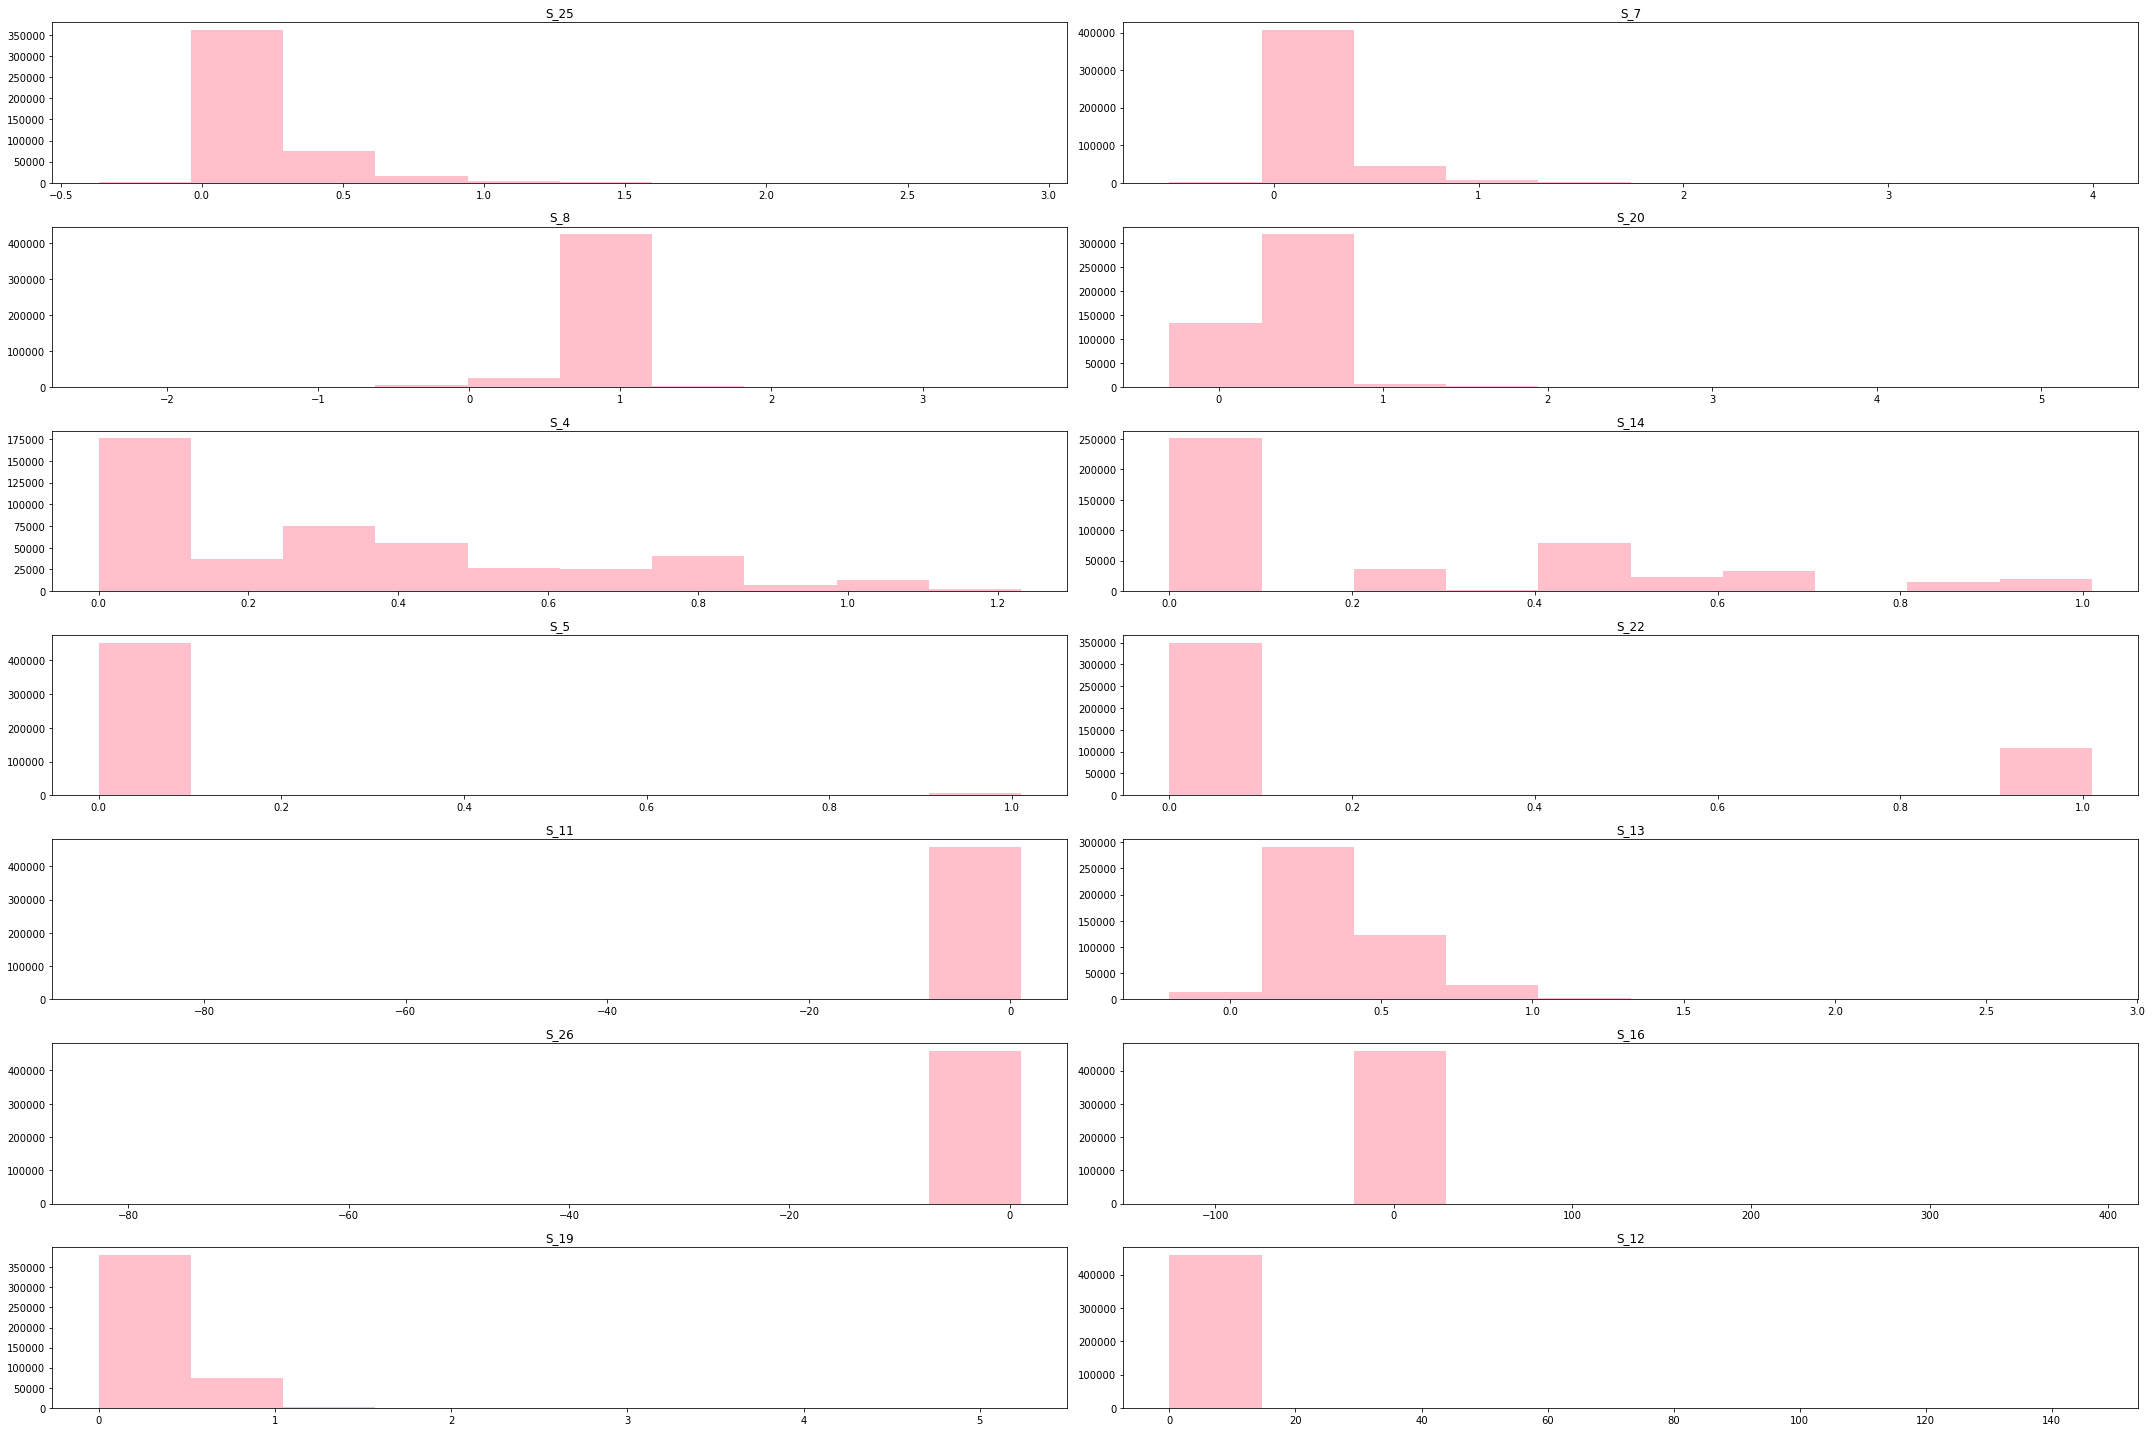

In [96]:
#plot distribution for S variables
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize=(30,20)) 
axes = axes.flatten()   
for ax,col in zip(axes,s_columns):
    ax.hist(Train[col], color="pink")
    ax.set_title(col)
    
plt.tight_layout()

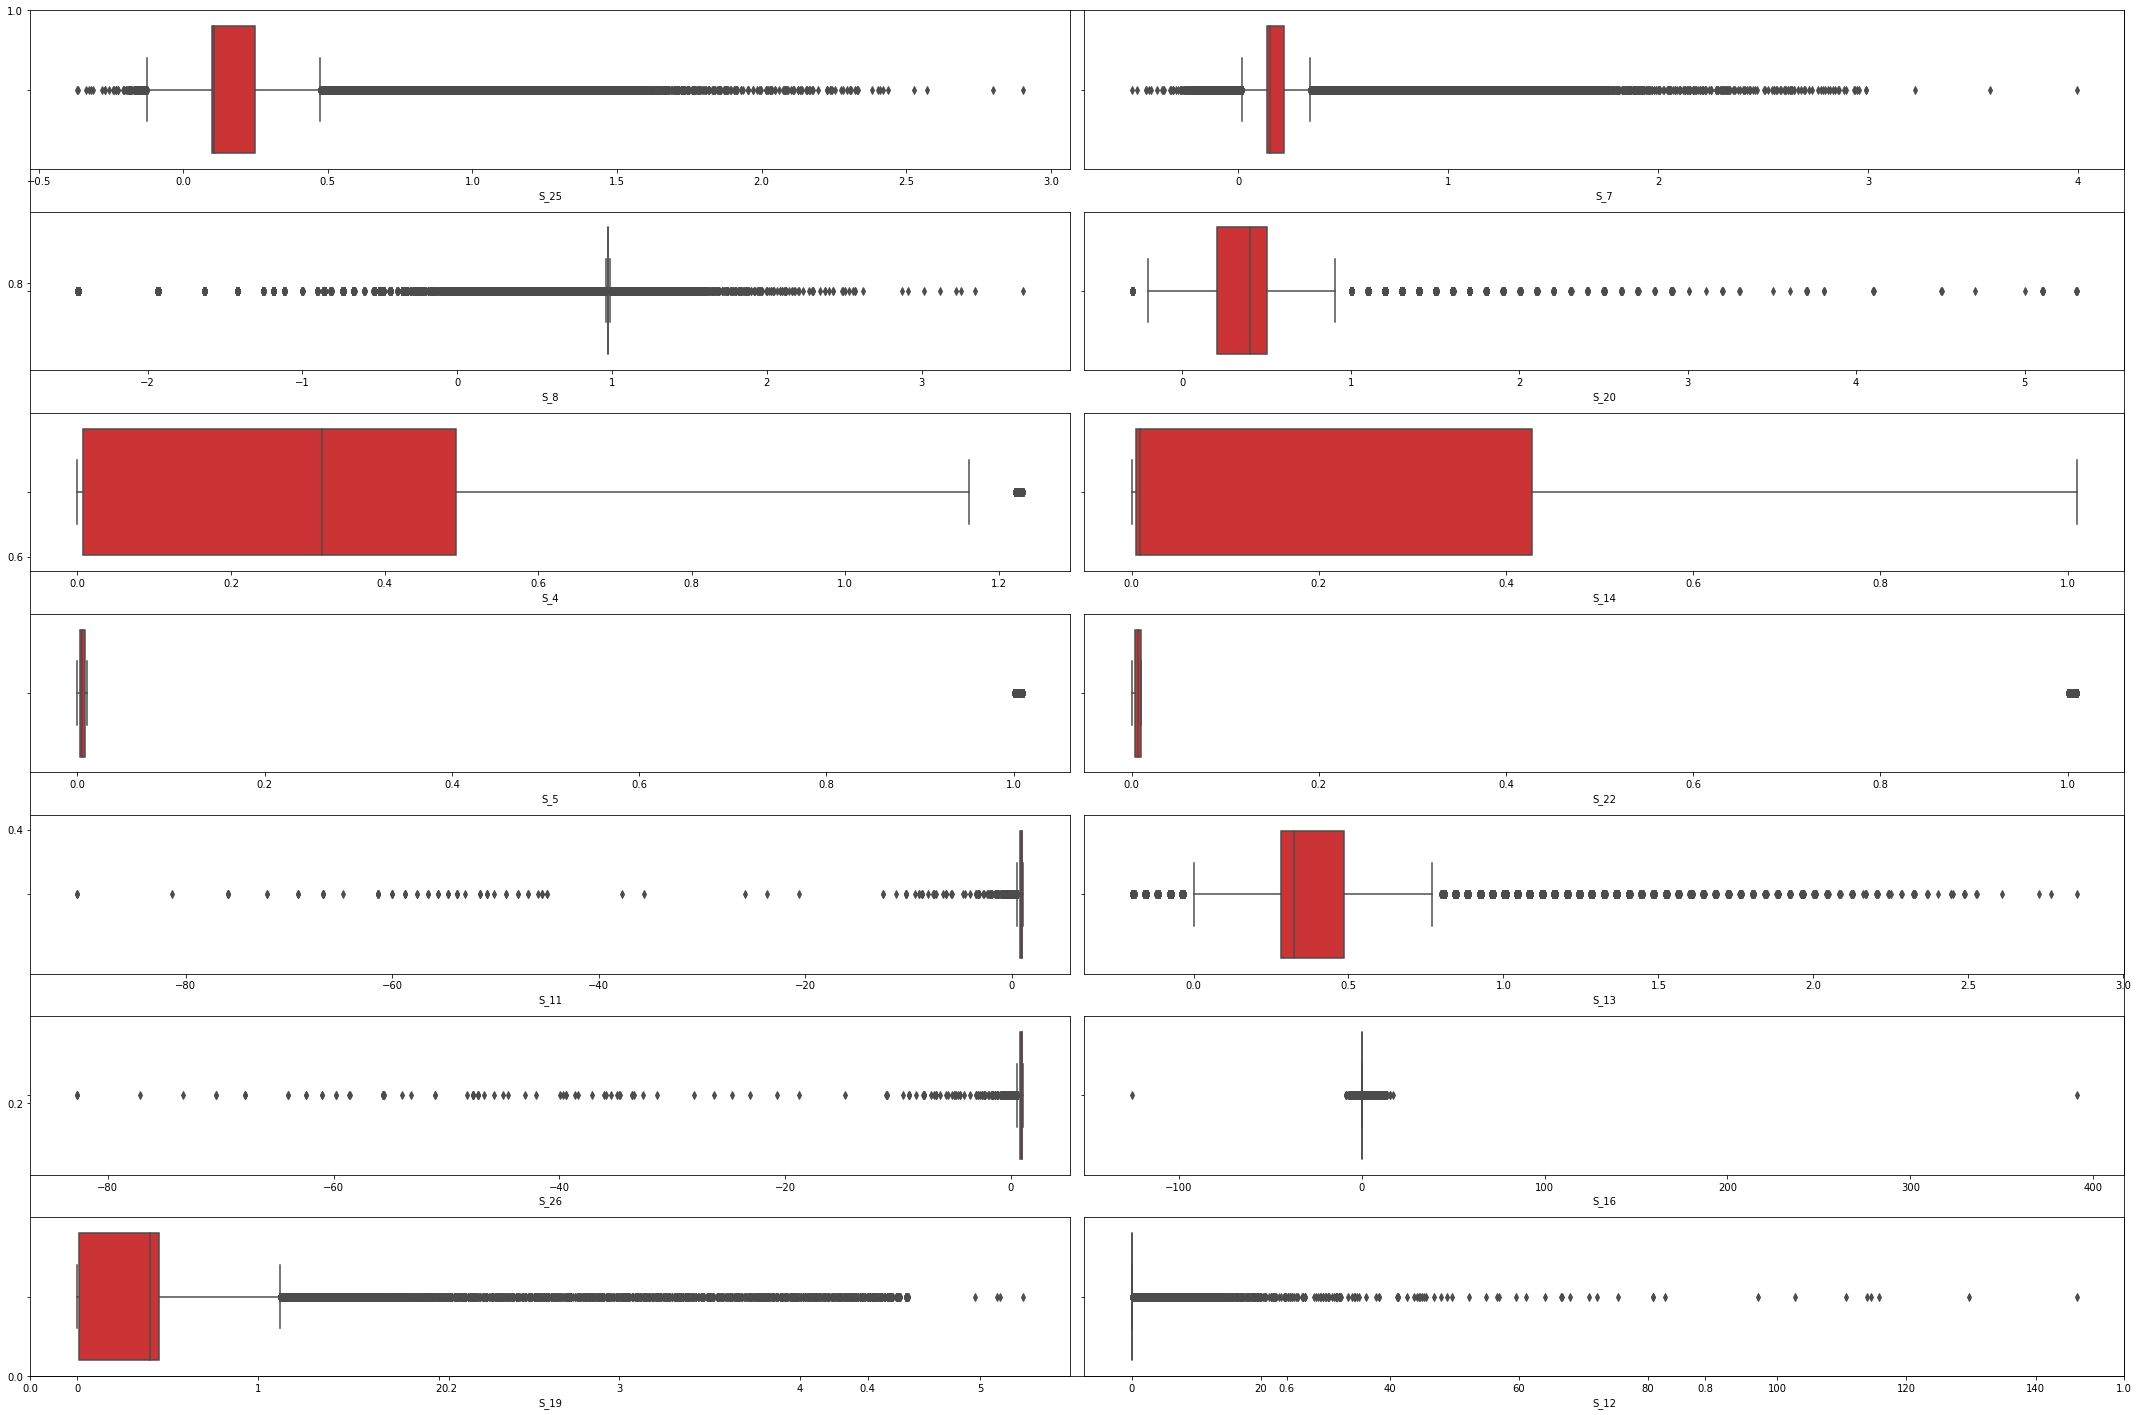

In [97]:
#plot outlier for S variables
nrows = 7
ncols = 2
fig, axes = plt.subplots(figsize=(30,20)) 

for i, col in enumerate(s_columns):
    ax=fig.add_subplot(nrows, ncols, i+1)
    sns.boxplot(x=Train[col], ax=ax, palette='Set1')
    
fig.tight_layout()  
plt.show()

In [105]:
# Function for imputating with the values inplace of outliers
def impute_outliers_IQR(df):
    q1=df.quantile(0.25) 
    q3=df.quantile(0.75)
    IQR=q3-q1
    
    upper = df[~(df>(q3+1.5*IQR))].max()
    lower = df[~(df<(q1-1.5*IQR))].min()
    
    df = np.where(df > upper,df.median(),np.where(df < lower,df.median(),df))
    return df

In [99]:
Train.columns.values

array(['B_9', 'B_25', 'B_30', 'B_5', 'B_10', 'B_32', 'B_35', 'B_18',
       'B_17', 'B_3', 'B_13', 'B_19', 'B_36', 'B_11', 'B_42', 'B_20',
       'B_12', 'B_14', 'B_23', 'B_6', 'B_29', 'B_37', 'B_2', 'B_38',
       'B_15', 'B_24', 'B_28', 'B_40', 'B_41', 'D_40', 'D_22', 'D_99',
       'D_2', 'D_129', 'D_56', 'D_50', 'D_64', 'D_65', 'D_138', 'D_89',
       'D_107', 'D_1', 'D_6', 'D_18', 'D_93', 'D_133', 'D_120', 'D_121',
       'D_67', 'D_74', 'D_23', 'D_90', 'D_59', 'D_29', 'D_55', 'D_98',
       'D_70', 'D_100', 'D_124', 'D_19', 'D_49', 'D_26', 'D_54', 'D_60',
       'D_20', 'D_9', 'D_52', 'D_8', 'D_5', 'D_79', 'D_139', 'D_135',
       'D_7', 'D_4', 'D_123', 'D_108', 'D_117', 'D_84', 'D_51', 'D_47',
       'D_87', 'D_126', 'D_106', 'D_25', 'D_27', 'D_34', 'D_78', 'D_91',
       'D_85', 'D_15', 'D_69', 'D_32', 'D_130', 'P_2', 'P_1', 'P_3',
       'R_13', 'R_24', 'R_11', 'R_5', 'R_19', 'R_3', 'R_28', 'R_23',
       'R_6', 'R_25', 'R_22', 'R_26', 'R_4', 'R_27', 'R_14', 'R_20',
       'R_

In [100]:
col_list = ['B_9', 'B_25', 'B_30', 'B_5', 'B_10', 'B_32', 'B_35', 'B_18',
       'B_17', 'B_3', 'B_13', 'B_19', 'B_36', 'B_11', 'B_42', 'B_20',
       'B_12', 'B_14', 'B_23', 'B_6', 'B_29', 'B_37', 'B_2', 'B_38',
       'B_15', 'B_24', 'B_28', 'B_40', 'B_41', 'D_40', 'D_22', 'D_99',
       'D_2', 'D_129', 'D_56', 'D_50', 'D_64', 'D_65', 'D_138', 'D_89',
       'D_107', 'D_1', 'D_6', 'D_18', 'D_93', 'D_133', 'D_120', 'D_121',
       'D_67', 'D_74', 'D_23', 'D_90', 'D_59', 'D_29', 'D_55', 'D_98',
       'D_70', 'D_100', 'D_124', 'D_19', 'D_49', 'D_26', 'D_54', 'D_60',
       'D_20', 'D_9', 'D_52', 'D_8', 'D_5', 'D_79', 'D_139', 'D_135',
       'D_7', 'D_4', 'D_123', 'D_108', 'D_117', 'D_84', 'D_51', 'D_47',
       'D_87', 'D_126', 'D_106', 'D_25', 'D_27', 'D_34', 'D_78', 'D_91',
       'D_85', 'D_15', 'D_69', 'D_32', 'D_130', 'P_2', 'P_1', 'P_3',
       'R_13', 'R_24', 'R_11', 'R_5', 'R_19', 'R_3', 'R_28', 'R_23',
       'R_6', 'R_25', 'R_22', 'R_26', 'R_4', 'R_27', 'R_14', 'R_20',
       'R_17', 'R_10', 'R_18', 'R_2', 'R_16', 'R_9', 'S_25', 'S_7', 'S_8',
       'S_20', 'S_4', 'S_14', 'S_5', 'S_22', 'S_11', 'S_13', 'S_26',
       'S_16', 'S_19', 'S_12']

In [102]:
len(col_list)

132

In [101]:
for i in col_list:
    Train[i] = impute_outliers_IQR(Train[i])

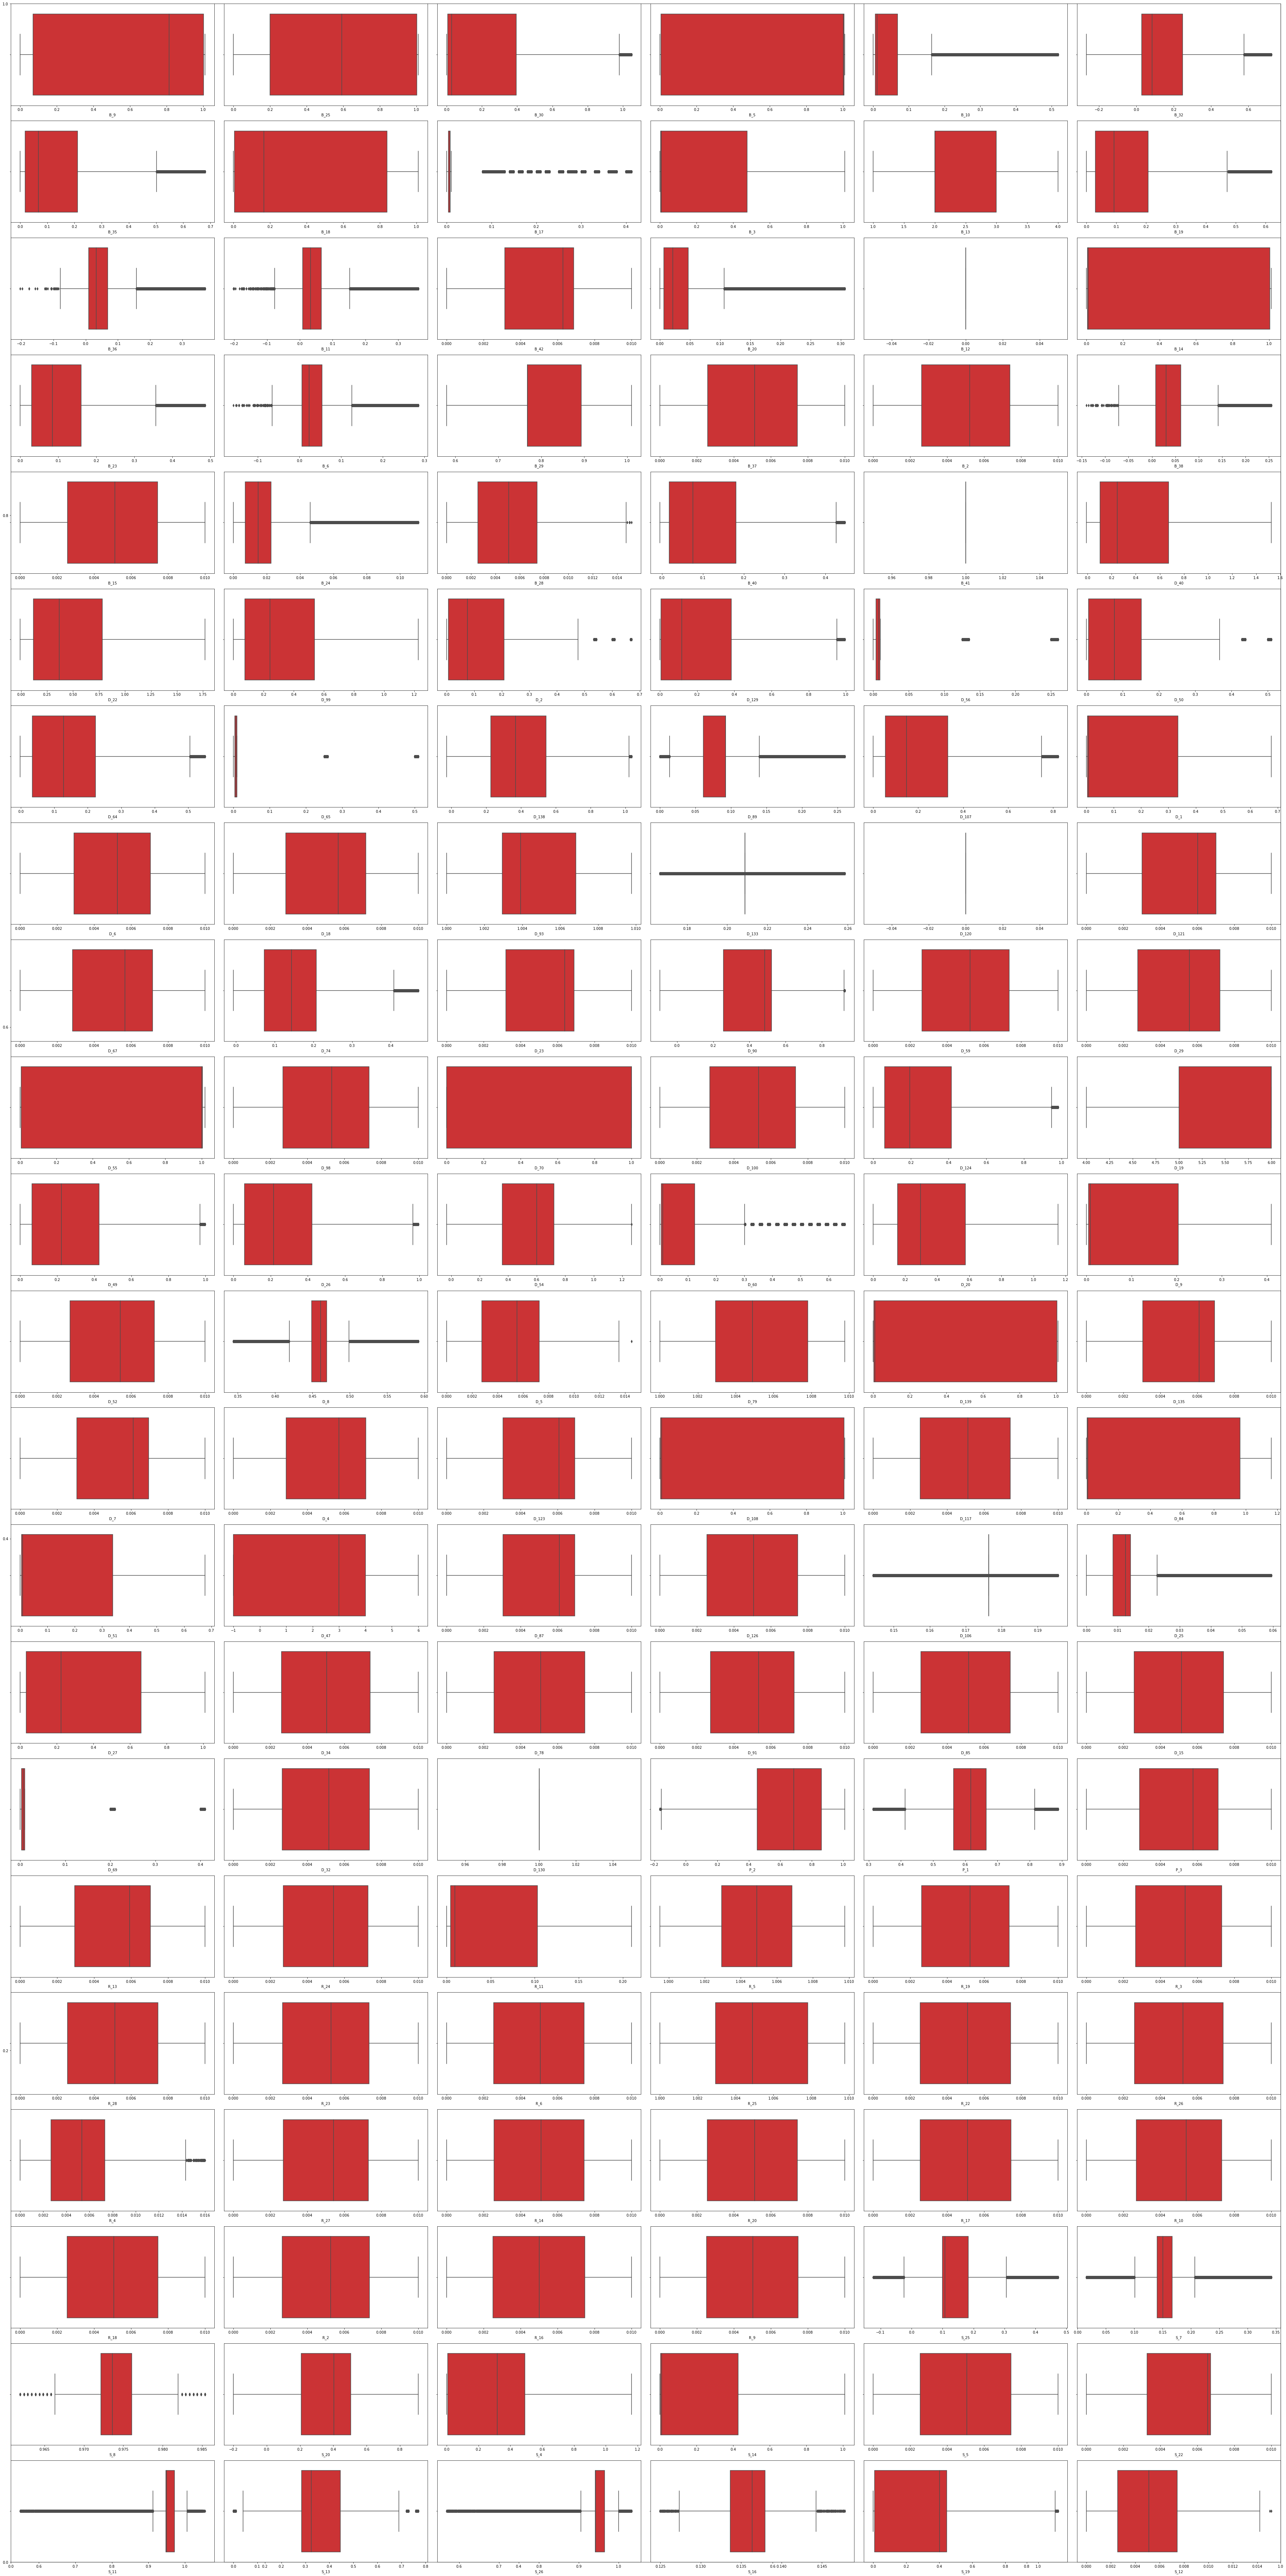

In [104]:
#plot outlier for all the variables after imputation
nrows = 22
ncols = 6
fig, axes = plt.subplots(figsize=(50,100)) 

for i, col in enumerate(col_list):
    ax=fig.add_subplot(nrows, ncols, i+1)
    sns.boxplot(x=Train[col], ax=ax, palette='Set1')
    
fig.tight_layout()  
plt.show()

**Observation:**
    As can be seen, only few of the features has outliers now. 

**Encoding of categorical features**

In [106]:
LE = LabelEncoder()
Train['D_36'] = LE.fit_transform(Train['D_36'])
Train['D_44'] = LE.fit_transform(Train['D_44'])

In [107]:
Train.shape

(458913, 134)

In [108]:
Train.head(5)

,B_9,B_25,B_30,B_5,B_10,B_32,B_35,B_18,B_17,B_3,...,S_5,S_22,S_11,S_13,S_26,S_16,S_19,S_12,D_44,D_36
0,1.001953,1.003906,0.021301,1.000977,0.002903,0.024246,0.015488,0.002880,0.001782,0.000025,...,0.004307,0.009720,0.963379,0.644531,0.981934,0.138306,0.249512,0.000228,0,1
1,0.375977,0.001836,0.088501,0.007504,0.030136,0.130737,0.139648,0.838867,0.002260,0.059265,...,0.009224,0.000648,0.976562,0.408691,0.966309,0.133301,0.273682,0.004539,0,0
2,1.003906,1.002930,0.005821,1.008789,0.000469,0.024536,0.016190,0.006405,0.005291,0.004673,...,0.009636,0.002865,0.918457,0.407715,0.902832,0.140015,0.343506,0.009247,0,1
3,0.819336,0.533691,0.002443,1.002930,0.006641,0.086182,0.077209,0.092346,0.006260,0.007935,...,0.007523,0.002518,0.904785,0.366699,0.890137,0.132080,0.006130,0.009140,0,2
4,1.005859,1.001953,0.008247,1.008789,0.007542,0.013382,0.008331,0.172974,0.006237,0.006451,...,0.000535,0.000495,0.954102,0.362793,0.940918,0.130859,0.437500,0.001273,0,4


In [109]:
X_train,X_test,y_train,y_test = train_test_split(Train,y,test_size = 0.3)

In [110]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

In [111]:
import xgboost as xg

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [112]:
xgc = xg.XGBClassifier(learning_rate =0.3,
 n_estimators=500,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 seed=27)
xgc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=6,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=27, ...)

In [113]:
y_pred = xgc.predict(X_test)
accuracy_score(y_pred,y_test)

0.809717157923791

In [114]:
# view the feature scores
feature_scores = pd.Series(xgc.feature_importances_, index=Train.columns).sort_values(ascending=False)
feature_scores*100

P_2      20.240616
B_9       7.971047
D_40      4.265953
D_60      3.343232
B_30      3.339646
           ...    
R_25      0.261256
D_120     0.000000
B_12      0.000000
D_130     0.000000
B_41      0.000000
Length: 134, dtype: float32

In [115]:
del xgc,X_train,X_test,y_train,y_test,Train